# GML - Mini-Challenge 2 - HS 2023

**Ausgabe:** Montag, 13. November 2023  
**Abgabe:** Montag, 18. Dezember 2023, bis 24 Uhr 

In diesem Mini-Challenge implementieren wir ein Multi-Layer Perceptron, verwenden verschiedene weitere Methoden zur Klassifikation, und machen Gebrauch von Model Selection-Prinzipien und -Algorithmen.

#### Vorgaben zu Umsetzung und Abgabe


- Code muss in python geschrieben werden.
- Der Code muss von Anfang bis Ende lauffähig sein bei Ausführung im Docker-Container des Trainingcenters. Nur was korrekt ausführt wird bewertet.
- Es darf kein Code ausgelagert werden.
- Es dürfen keine zusätzlichen Files angelegt werden, die für das korrekte Ausführen des Codes notwendig sind. Auch für Daten nicht.


- Sämtliche **Plots** müssen **komplett beschriftet** (Titel, Achsen, Labels, Colorbar, ..) sein, sodass sie einfach, ohne den Code zu konsultieren, verstanden werden können.
- Zu jedem Plot gehört eine **kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten, die damit sichtbar werden, festhält**.  


- **Nur vollständig beschriftete Plots mit dazugehörender Diskussion werden bewertet.**


- Als **Abgabe** zählt der letzte Commit in deinem Fork des Repos vor Abgabetermin.
- Falls du die Mini-Challenge abgeben und bewerten lassen möchtest, so **schreibe eine kurze Email** an den Fachexperten (moritz.kirschmann@fhnw.ch) innerhalb von zwei Tagen nach Abgabe.  


- **Bitte lösche, dupliziere oder verschiebe die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Du darfst aber beliebig viele weitere Zellen hinzufügen.


- Importiere Daten mit **relativen Pfaden** innerhalb des Repos.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden. Wir kopierter Code oder Text identifiziert, so werden sämtliche betroffenen Aufgaben von allen Beteiligten mit 0 Punkten bewertet.**

---

#### Module

Neben den Modulen der Python Standard-Library dürfen die folgenden Module immer benutzt werden: `numpy`, `pandas`, `matplotlib`, `seaborn`,  `tqdm`.

Weiter dürfen auch generell [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), [`sklearn.model_selection`](https://scikit-learn.org/stable/model_selection.html) und [`sklearn.compose`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose) benutzt werden.

Zusätzliche Module dürfen nur verwendet werden wenn dies ausdrücklich erwähnt oder bereits vorgegeben ist in der Code-Cell.

---

#### Bewertung

Bewertet wird:

- Vollständigkeit (Code, Text)
- Korrektheit (Code, Text)
- Implementation (z.B. Vektorisierung der Operationen, Scikit-Learn API, Visualisierungen, Lesbarkeit Code/Output)

---

## Einleitung

### Hintergrund

Karolina arbeitet as Biologin in einer Forschungsgruppe, die Leukämie erforscht. Um in Experimenten zu untersuchen, welche Wirkstoffe Einfluss auf die Häufigkeitsverteilung unterschiedliche Blutzelltypen nehmen, müssen Zelltypen klassifiziert werden. Karolina möchte diese Klassifizierung automatisieren, um ohne grossen manuellen Aufwand tausende von Experimenten mit Millionen von Zellen auswerten zu können.

Sie hat schon viel Vorarbeit geleistest: Sie hat Blutproben (Giemsa-)gefärbt, mit einem automatisierten Mikroskop aufgenommen und die Bilder nach Zelltype klassifiziert. Ebenso hat sie eine Pipeline erstellt, die die Bilder automatisch segmentiert (Siehe: https://www.cellpose.org). Segmentieren bedeutet, dass die Bildbereiche, die zu den klassifizierten Zellen gehören, vom Hintergrund und den Nachbarzellen getrennt werden. Die Segmentierung wird jeweils als Segmentierungskarte gespeichert. (Siehe Beispiel Bilder und Segmentierungskarten unten).
Dann hat Karolina zellbezogenen Features mit *FIJI / ImageJ* (Siehe https://imagej.net/ij/index.html) erzeugt. Die Features sind hier erläutert: https://imagejdocu.list.lu/gui/analyze/set_measurements 

Im Ergebnis hat Karolina zwei Tabellen *bloodcells_train.csv* und *bloodcells_test.csv*.
Nun braucht Karolina Hilfe von Dir.

### Vorgehen

Du sollst zur Klassifikation der Zellen (Zielvariable `Class`) verschiedene Machine-Learning Modelle miteinander vergleichen und dabei auch ein Multi-Layer Perceptron implementieren.





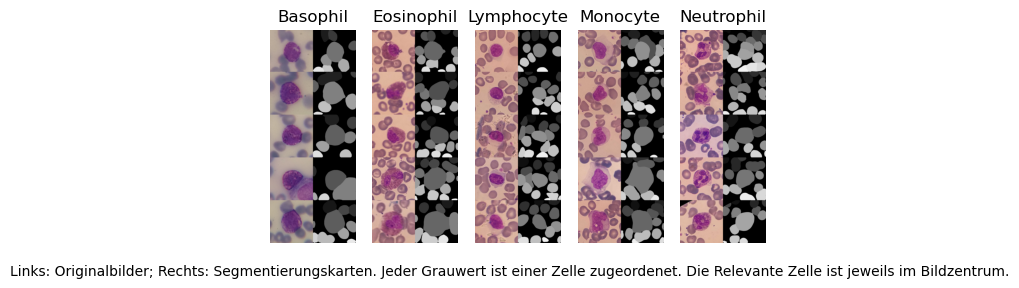

In [1]:
from IPython.display import Image
from PIL import Image as PILImage
import matplotlib.pyplot as plt

# Lade Bilder
img1 = PILImage.open('data/Basophil.png')
img2 = PILImage.open('data/Eosinophil.png')
img3 = PILImage.open('data/Lymphocyte.png')
img4 = PILImage.open('data/Monocyte.png')
img5 = PILImage.open('data/Neutrophil.png')

# Initialisiere Subplots
fig, ax = plt.subplots(1,5)

ax[0].imshow(img1)
ax[0].axis('off') 
ax[0].set_title('Basophil') 
ax[1].imshow(img2)
ax[1].axis('off')
ax[1].set_title('Eosinophil')
ax[2].imshow(img3)
ax[2].axis('off') 
ax[2].set_title('Lymphocyte')
ax[3].imshow(img4)
ax[3].axis('off') 
ax[3].set_title('Monocyte')
ax[4].imshow(img5)
ax[4].axis('off') 
ax[4].set_title('Neutrophil')

# Füge eine Unterschrift zur gesamten Abbildung hinzu
fig.text(0.5, 0.2, 'Links: Originalbilder; Rechts: Segmentierungskarten. Jeder Grauwert ist einer Zelle zugeordenet. Die Relevante Zelle ist jeweils im Bildzentrum.', ha='center', va='bottom')
plt.show()



---

### Aufgabe 1 - Trainingsdaten (8 Punkte)

Verschaffe Dir einen Überblick über den Blutzellen-Datensatz (`/data/bloodcells_train.csv`) mittels Visualisierungen und deskriptiver Statistik, sodass du ein gutes Verständnis vom Datensatz bekommst und bereit bist, diesen zu modellieren. Die Bilder und Segmentierungskarten stehen Dir ebenfalls zur Ansicht bereit (siehe `/data/Images`). Es wird nicht erwartet, dass die Bilder zur Analyse herangezogen werden, sie sollen jedoch ermöglichen ein besseres Gefühl für die Domäne zu bekommen.

Erläutere die Ergebnisse der deskriptiven Analyse: Was ist dir aufgefallen? Was sind deine Erwartungen bezüglich der Modellierung von `Class`?

Erörtere, wie du den Datensatz vorzubereiten musst, um das Attribut `Class` mit Hilfe der verfügbaren Features vorherzusagen.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
accuracys = {}
f1_scores = {}

In [4]:
train_data = pd.read_csv('data/bloodcells_train.csv', delimiter=';')
train_data

image filename   Area  Mean red  StdDev red  Mode red  Min red  \
0     95-5-10-1_231_1.jpg   36063   101.964      49.394        37       20   
1      95-9-4-4_121_1.jpg    6432    97.806      41.106        53       39   
2      95-5-4-1_182_1.jpg   32524   156.996      23.149       157      100   
3      95-8-13-3_60_2.jpg   25293   124.220      47.617        81       54   
4     95-5-10-1_645_2.jpg   44853   167.199      58.149       219       52   
...                    ...    ...       ...         ...       ...      ...   
5082  95-8-12-5_216_3.jpg   29002   121.817      30.880        98       72   
5083  95-8-24-1_231_1.jpg   20568   134.624      25.069       118       99   
5084  95-8-10-1_578_1.jpg   46598   163.671      35.299       188       80   
5085  95-8-20-3_157_1.jpg   16096   155.947      17.368       146      127   
5086  95-5-10-1_769_1.jpg   28444   134.449      49.344        61       54   

      Max min   Perim.  Circ.    Feret  ...  Min green  Max blue  Max green  \
0         187  774.767  0.755  260.967  ...          0       183        162   
1         190  329.765  0.743  121.672  ...          2       161        127   
2         251  717.696  0.793  252.242  ...         24       186        193   
3         217  609.955  0.854  213.328  ...          0       180        171   
4         239  815.151  0.848  257.329  ...          1       202        181   
...       ...      ...    ...      ...  ...        ...       ...        ...   
5082      233  637.955  0.895  211.405  ...          2       203        181   
5083      229  538.701  0.891  176.366  ...          3       162        155   
5084      223  833.820  0.842  277.723  ...          4       178        175   
5085      207  520.558  0.746  194.610  ...         23       176        149   
5086      230  638.240  0.877  201.022  ...          5       207        170   

      Median blue  Median green  Skew blue  Skew green  Kurt blue  Kurt green  \
0             119            53      0.013       0.155     -1.254      -1.707   
1             100            23      0.699       0.775     -0.741      -0.863   
2             139            55      0.919       1.540      0.531       1.382   
3             124            29      0.148       0.512     -1.438      -1.424   
4             151           123     -0.389      -0.403     -1.333      -1.592   
...           ...           ...        ...         ...        ...         ...   
5082          110            20      0.935       1.299     -0.145       0.284   
5083           94            16      0.881       1.567     -0.269       1.099   
5084          139           113     -0.447      -0.507     -1.003      -1.326   
5085          125            46      0.911       0.893      0.266      -0.649   
5086          130            56      0.276       0.372     -0.921      -1.199   

           Class  
0     Neutrophil  
1     Neutrophil  
2     Lymphocyte  
3     Lymphocyte  
4     Neutrophil  
...          ...  
5082  Lymphocyte  
5083  Lymphocyte  
5084  Neutrophil  
5085  Eosinophil  
5086  Neutrophil  

[5087 rows x 35 columns]

In [5]:
train_data.describe()

Area     Mean red   StdDev red     Mode red      Min red  \
count    5087.000000  5087.000000  5087.000000  5087.000000  5087.000000   
mean    50481.638883   146.920406    35.667879   149.103204    69.550226   
std     45702.772788    30.605221    11.344800    53.218679    28.285755   
min      3220.000000    37.819000     8.485000     0.000000     0.000000   
25%     24097.000000   126.991500    27.048000   106.000000    49.000000   
50%     36493.000000   145.866000    35.841000   161.000000    68.000000   
75%     49862.000000   161.834000    43.874500   190.000000    88.000000   
max    267360.000000   234.612000    90.441000   251.000000   167.000000   

           Max min       Perim.        Circ.        Feret        IntDen  ...  \
count  5087.000000  5087.000000  5087.000000  5087.000000  5.087000e+03  ...   
mean    221.068017  1337.205372     0.717955   307.756773  8.464791e+06  ...   
std      14.236490  1632.764005     0.265241   201.637119  9.829182e+06  ...   
min     156.000000   228.936000     0.029000    79.398000  3.764240e+05  ...   
25%     212.000000   610.018000     0.716000   202.640000  3.133865e+06  ...   
50%     221.000000   753.512000     0.838000   243.822000  5.155505e+06  ...   
75%     231.000000   866.235000     0.874000   280.102500  7.562943e+06  ...   
max     255.000000  7393.481000     0.907000   813.173000  5.423669e+07  ...   

          Min blue    Min green     Max blue    Max green  Median blue  \
count  5087.000000  5087.000000  5087.000000  5087.000000  5087.000000   
mean     83.956753     6.254177   184.559269   174.383133   131.637114   
std      13.954525     9.365165    11.884603    16.096887    21.087678   
min       0.000000     0.000000   141.000000   108.000000    75.000000   
25%      74.000000     1.000000   177.000000   164.000000   117.000000   
50%      84.000000     4.000000   184.000000   174.000000   129.000000   
75%      93.000000     8.000000   192.000000   184.000000   141.000000   
max     145.000000    94.000000   234.000000   234.000000   202.000000   

       Median green    Skew blue   Skew green    Kurt blue   Kurt green  
count   5087.000000  5087.000000  5087.000000  5087.000000  5087.000000  
mean      82.599764     0.014661     0.100848    -0.017415     0.188772  
std       52.649852     0.907740     1.173118     1.726095     2.440377  
min        6.000000    -4.293000    -5.085000    -1.711000    -1.864000  
25%       34.000000    -0.405500    -0.481500    -1.065500    -1.364000  
50%       80.000000     0.042000     0.005000    -0.700000    -0.917000  
75%      112.000000     0.696000     1.044500     0.553500     1.182500  
max      209.000000     2.341000     2.856000    19.809000    29.547000  

[8 rows x 33 columns]

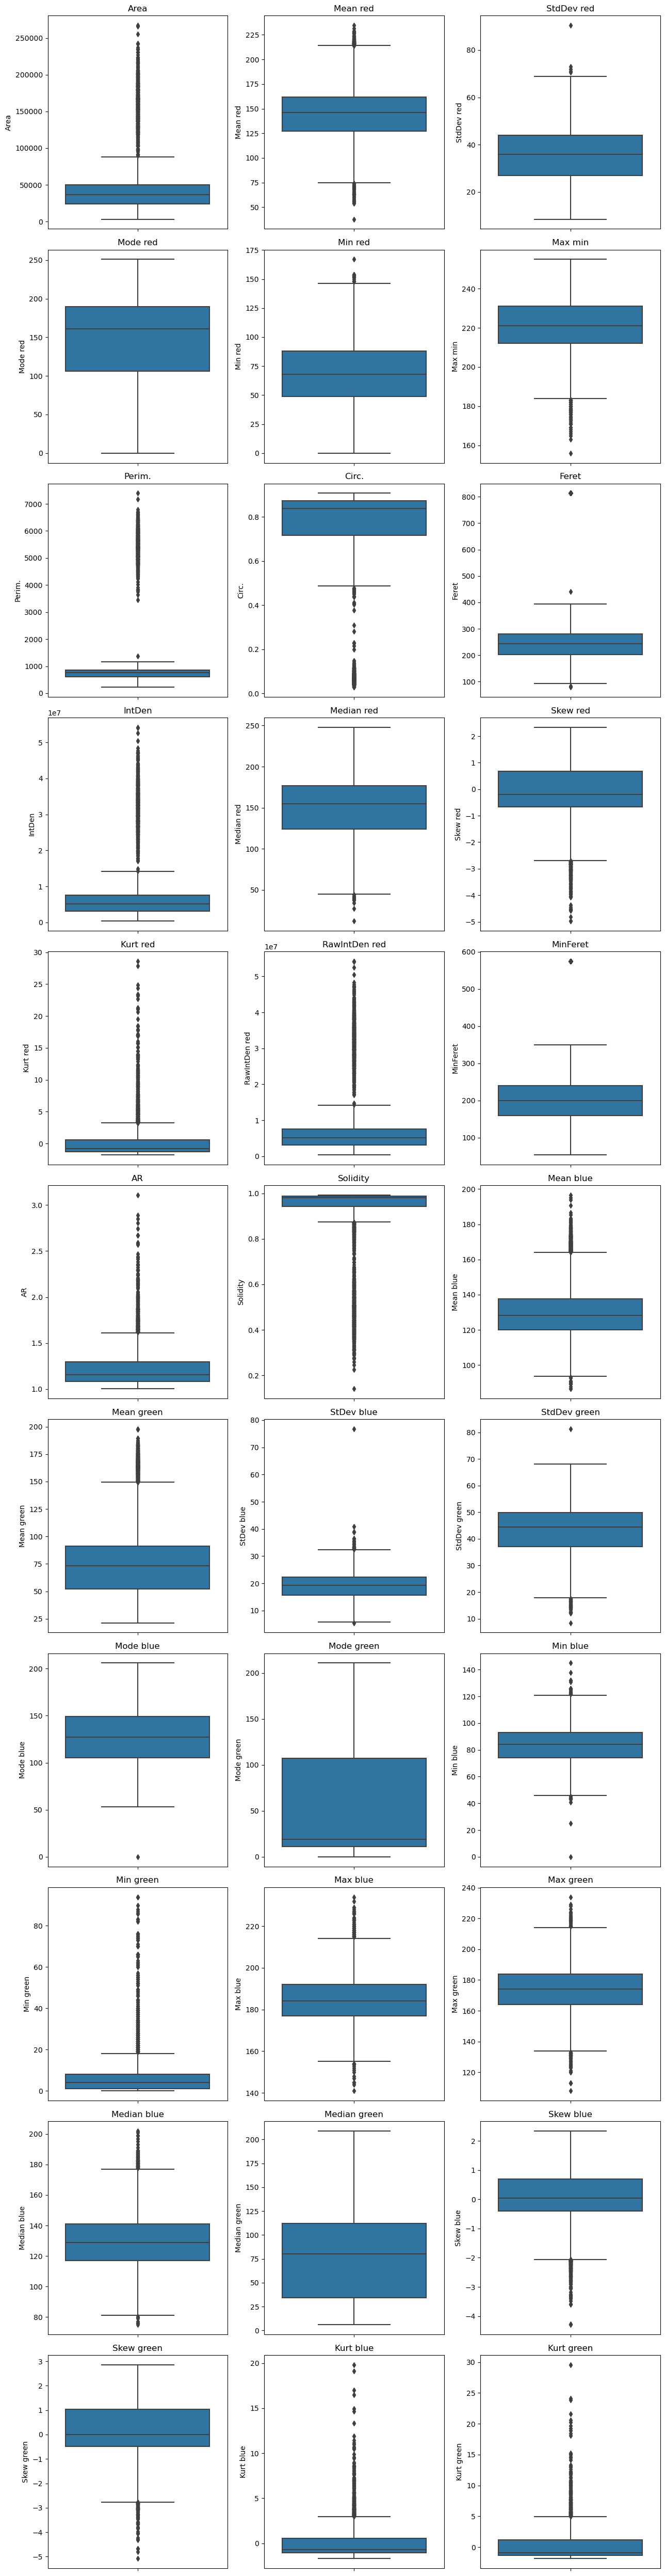

In [6]:
plt.figure(figsize=(13, 50))
for i, col in enumerate(train_data.select_dtypes(include=['number']), 1):
    plt.subplot(11, 3, i)
    sns.boxplot(y=train_data[col])
    plt.title(col)
    plt.tight_layout()


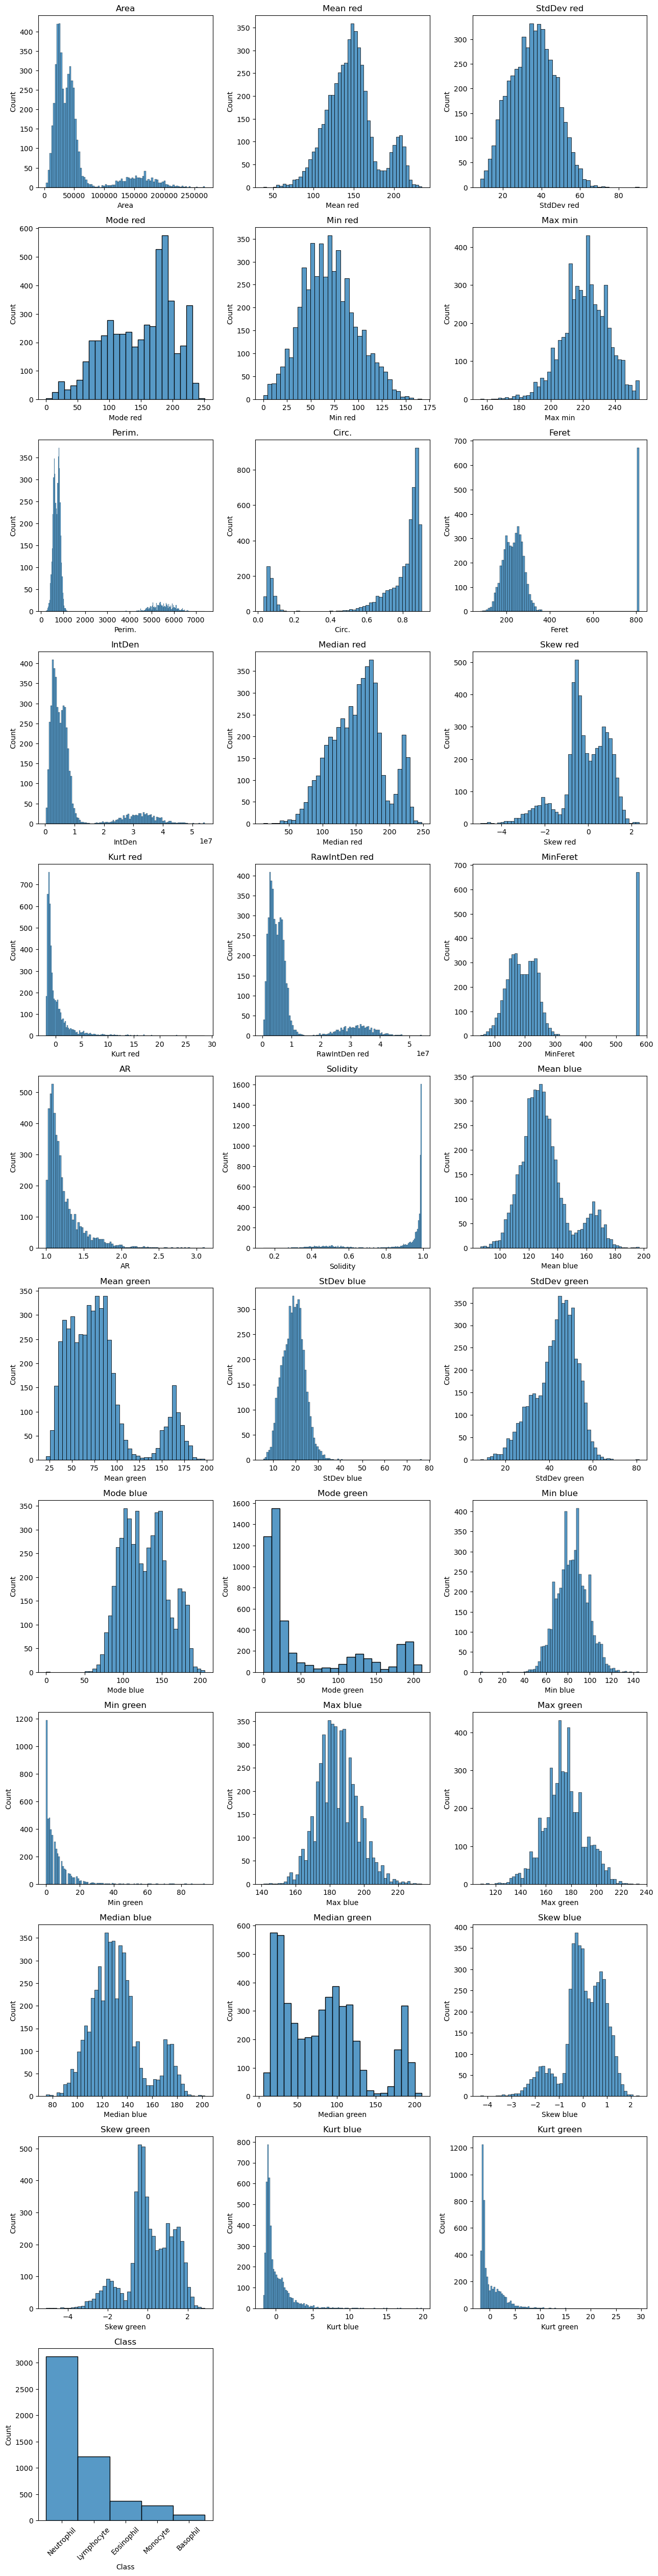

In [7]:
plt.figure(figsize=(13, 50))
for i, col in enumerate(train_data.drop(columns=['image filename']), 1):
    plt.subplot(12, 3, i)
    sns.histplot(x=train_data[col])
    plt.title(col)
    plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Die Verteilungen zeigen meist schöne bis mittelschöne Normalverteilungen. Bei einigen gibt es jedoch zwei Peakes. Die beiden Ferets stechen hier hervor, da es am Ende des Plots jeweils einen einzelnen grossen Peak hat. Ebenfalls sind die Klassen ungleichmässig verteilt.

Korrelationen

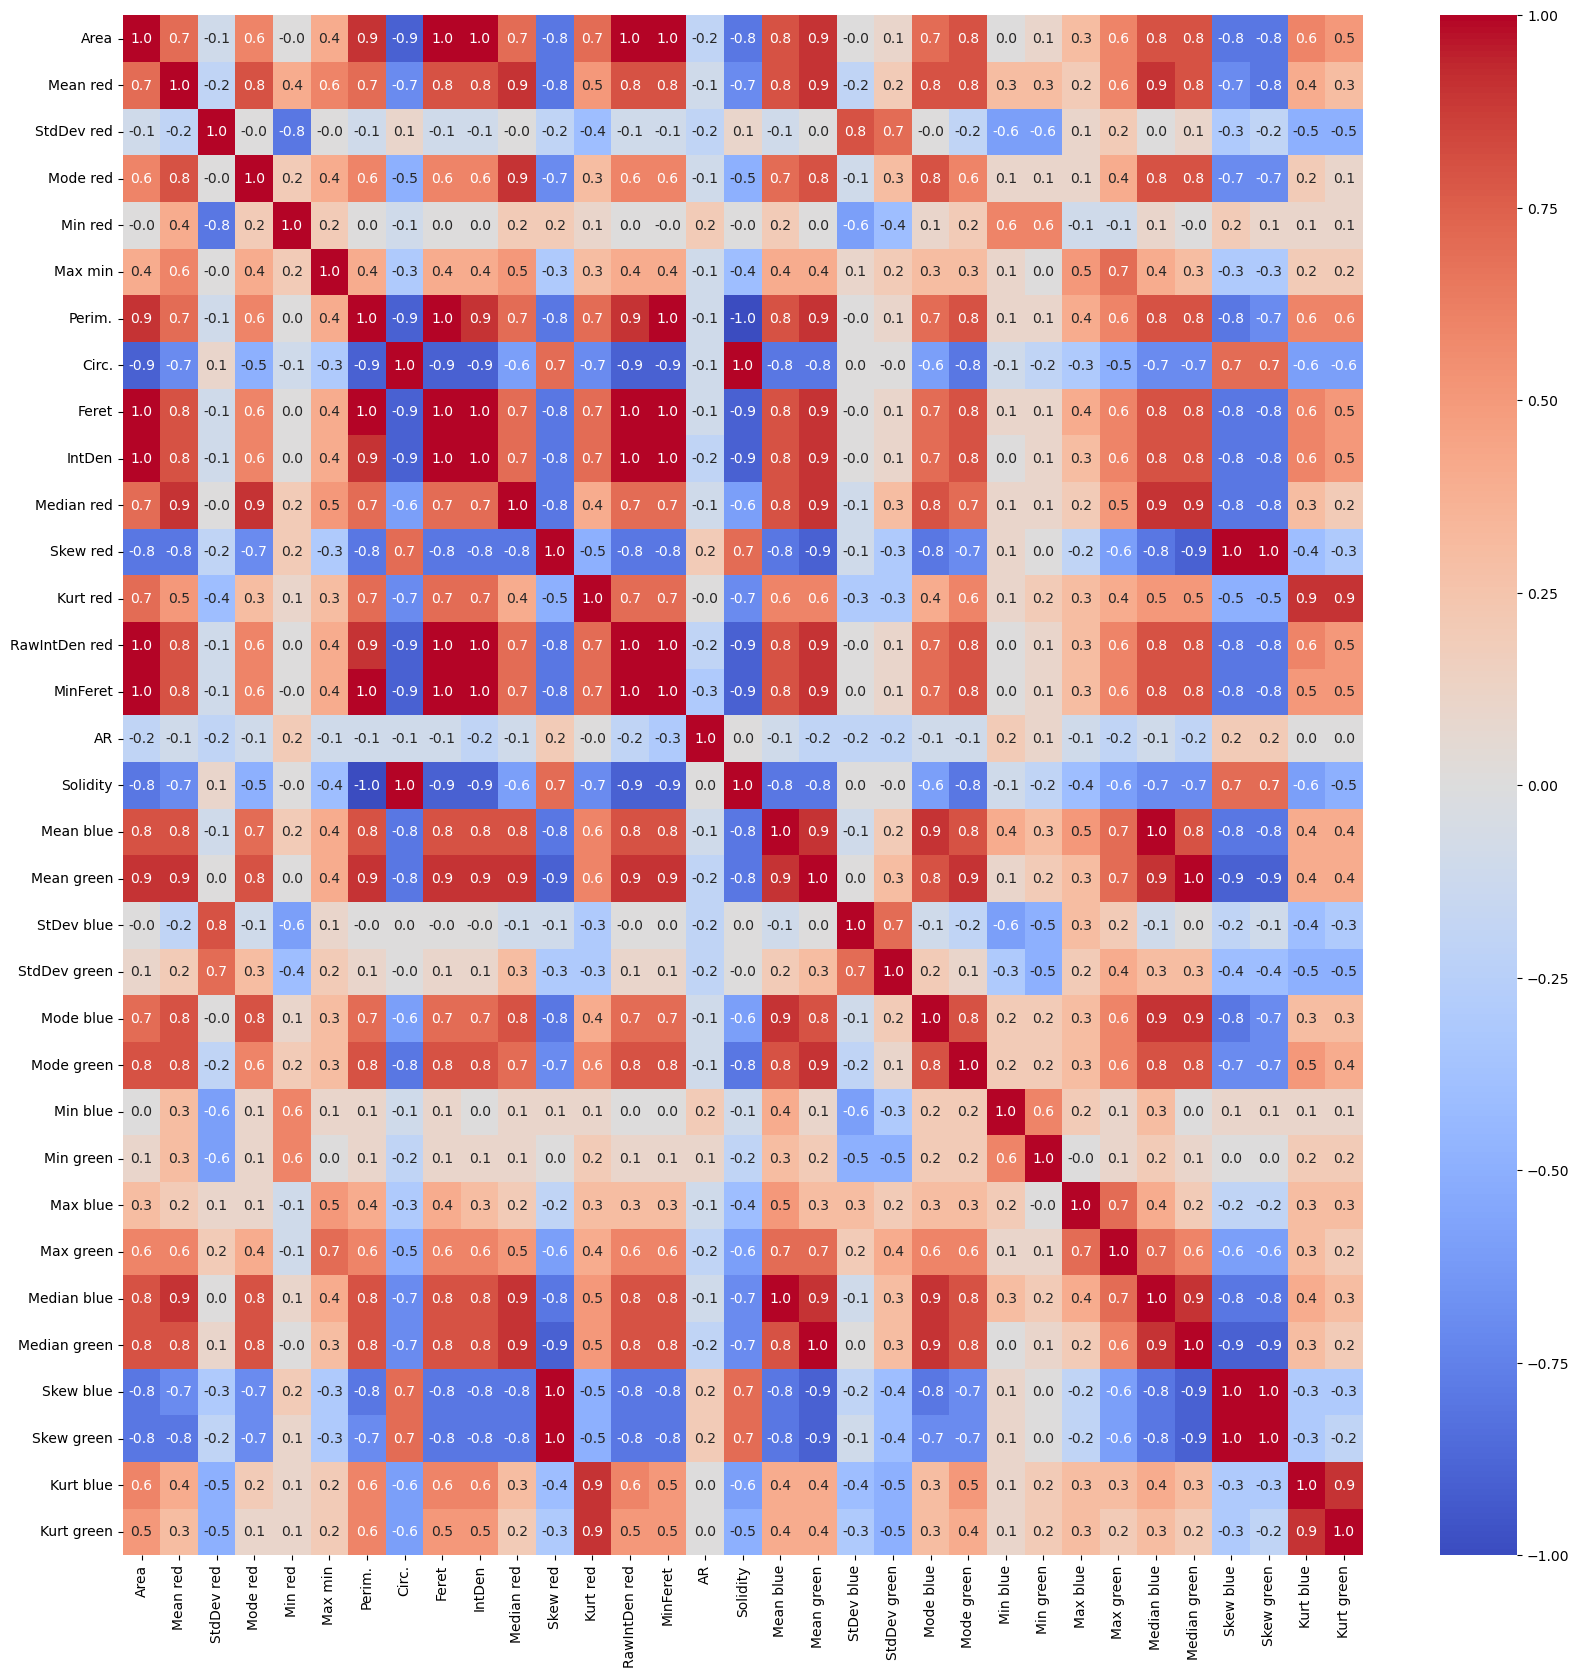

In [8]:
data_corr = train_data.drop(columns=['image filename', 'Class'])
data_corr = round(data_corr.corr(), 1)
plt.figure(figsize=(20, 20))
sns.heatmap(data_corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.show()

Es gibt viele Korrelationen zwischen den einzelen Features. Ich kenne jedoch den Datensatz noch zu wenig um Features rauslöschen zu können. Ich werde die Korrelationen im Hinterkopf behalten und schauen, ob ich sie später noch brauchen kann.

In [9]:
neutrophilData = train_data[train_data['Class'] == 'Neutrophil']
lymphocyteData = train_data[train_data['Class'] == 'Lymphocyte']
monocyteData = train_data[train_data['Class'] == 'Monocyte']
eosinophilData = train_data[train_data['Class'] == 'Eosinophil']
basophilData = train_data[train_data['Class'] == 'Basophil']

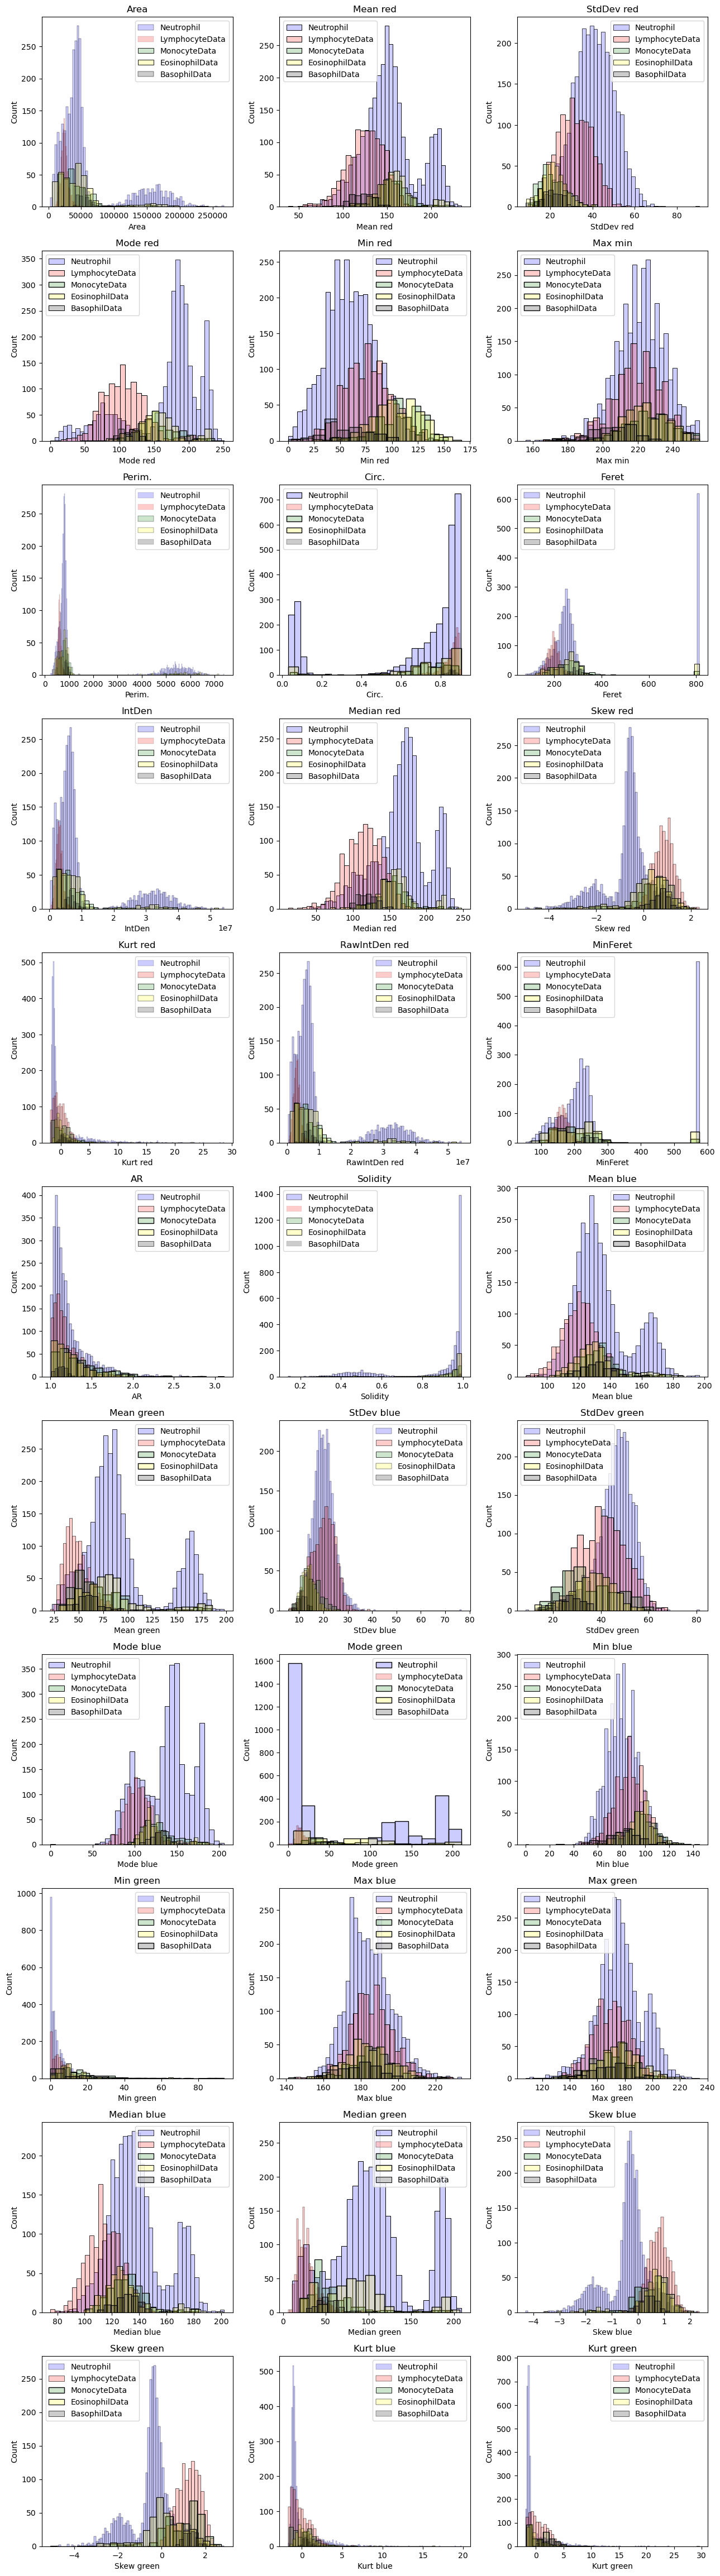

In [10]:
plt.figure(figsize=(13, 50))
for i, col in enumerate(neutrophilData.select_dtypes(include=['number']), 1):
    plt.subplot(12, 3, i)
    sns.histplot(x=neutrophilData[col], color='blue', label='Neutrophil', alpha=0.2)
    sns.histplot(x=lymphocyteData[col], color='red', label='LymphocyteData', alpha=0.2)
    sns.histplot(x=monocyteData[col], color='green', label='MonocyteData', alpha=0.2)
    sns.histplot(x=eosinophilData[col], color='yellow', label='EosinophilData', alpha=0.2)
    sns.histplot(x=basophilData[col], color='black', label='BasophilData', alpha=0.2)
    plt.legend()
    plt.title(col)
    plt.tight_layout()
plt.show()

Es sind einige Unterschiede zwischen den Klassen und den Verteilungen der jeweiligen Features zu erkennen. Ein gutes Beispiel sind z.B. die Farbverteilungen. Bei den übrigen Features ist es schwierig zu erkennen ob das ein Trend der spezifischen Klasse ist oder ob dies an der unterschiedlichen Häufigkeit der Klassen liegt.

**Einige Scatterplots**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


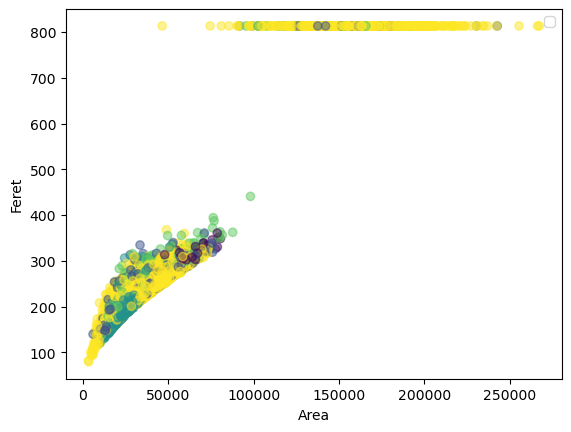

In [11]:
plt.scatter(train_data['Area'], train_data['Feret'], c=train_data['Class'].astype('category').cat.codes, alpha=0.5)
plt.xlabel('Area')
plt.ylabel('Feret')
plt.legend()
plt.show()

In [12]:
neutrophilData[neutrophilData['MinFeret'] == 575]

image filename    Area  Mean red  StdDev red  Mode red  Min red  \
10      95-9-4-7_47_2.jpg   201322   190.526      35.056       205       33   
24      95-9-4-7_34_1.jpg   184156   200.689      30.926       213       40   
27    95-8-24-1_104_4.jpg   120155   217.915      34.062       234       72   
39      95-9-4-4_12_1.jpg   157407   211.781      34.320       224       37   
43    95-8-12-4_104_2.jpg   120301   212.341      35.620       230       60   
...                    ...     ...       ...         ...       ...      ...   
5029   95-8-3-2_197_2.jpg   130452   216.516      22.024       228      100   
5034   95-8-8-2_133_1.jpg   120799   206.563      37.530       233       84   
5050   95-8-8-2_243_1.jpg   161495   183.807      39.415       209       56   
5051    95-8-8-3_53_2.jpg   186180   205.278      37.564       223       48   
5073  95-8-10-1_496_2.jpg   173117   198.949      38.412       226       68   

      Max min    Perim.  Circ.    Feret  ...  Min green  Max blue  Max green  \
10        218  4972.203  0.102  813.173  ...          4       187        189   
24        228  5022.117  0.092  813.173  ...          0       197        198   
27        254  5221.404  0.055  813.173  ...          0       188        200   
39        238  5923.695  0.056  813.173  ...          3       194        199   
43        241  5382.891  0.052  813.173  ...          2       205        206   
...       ...       ...    ...      ...  ...        ...       ...        ...   
5029      237  6180.829  0.043  813.173  ...         13       197        206   
5034      247  4616.592  0.071  813.173  ...          7       195        205   
5050      230  5657.671  0.063  813.173  ...          5       203        201   
5051      238  4379.282  0.122  813.173  ...          1       192        199   
5073      238  4508.838  0.107  813.173  ...          8       195        208   

      Median blue  Median green  Skew blue  Skew green  Kurt blue  Kurt green  \
10            163           174     -2.578      -2.744      6.256       6.796   
24            171           184     -2.317      -2.466      5.029       5.202   
27            168           183     -2.055      -2.090      3.401       3.233   
39            178           190     -2.792      -3.291      7.657      10.499   
43            181           194     -2.064      -2.308      3.597       4.734   
...           ...           ...        ...         ...        ...         ...   
5029          181           194     -2.603      -3.259      7.285      10.873   
5034          170           181     -1.054      -1.268      0.141       0.525   
5050          166           178     -1.176      -1.370      0.479       0.736   
5051          169           184     -1.933      -2.242      2.951       3.921   
5073          173           191     -1.218      -1.521      0.112       0.914   

           Class  
10    Neutrophil  
24    Neutrophil  
27    Neutrophil  
39    Neutrophil  
43    Neutrophil  
...          ...  
5029  Neutrophil  
5034  Neutrophil  
5050  Neutrophil  
5051  Neutrophil  
5073  Neutrophil  

[618 rows x 35 columns]

Feret ist laut Beschreibung die Distanz zwischen zwei Rändern durch den Mittelpunkt. Feret ist die maximale Distanz und der MinFeret ist die minimale Distanz. Unsere Bilder haben eine grösse von 575 x 575 Pixeln. Die Bilddiagonale ist somit 813.173 Pixel. Dies würde bedeuten, dass Bilder mit einem Feret von 813.173 Pixeln die ganze Diagonale ausfüllen. Ausserdem haben alle Daten mit einem Feret von 813.173 Pixeln auch einen MinFeret von 575 Pixeln. Das heisst, dass die Zelle das ganze Bild ausfüllen würde, was wiederum heissen müsste, dass die grösse der Zelle 575 x 575 Pixeln ist. Die Area ist jedoch nirgends 330625 Pixel gross, was die Fläche der Zelle wäre. Das heisst, dass die Daten mit einem Feret von 813.173 Pixeln falsch sind. Das gleiche gilt für die Daten mit einem MinFeret von 575 Pixeln.

**Datensätze mit falschen Ferets löschen**

In [13]:
AnzahlfalscheDaten = len(train_data[(train_data['Feret'] == 813.173) | (train_data['MinFeret'] == 575)])
print('Anzahl falsche Daten: ', AnzahlfalscheDaten)

Anzahl falsche Daten:  672


In [14]:
train_data = train_data.drop(train_data[train_data['Feret'] == 813.173].index)
train_data = train_data.drop(train_data[train_data['Feret'] == 575.0].index)

In [15]:
AnzahlfalscheDaten = len(train_data[(train_data['Feret'] == 813.173) | (train_data['MinFeret'] == 575)])
print('Neue Anzahl falsche Daten: ', AnzahlfalscheDaten)

Neue Anzahl falsche Daten:  0


IntDen und RawIntDen red haben die selben Werte. Ich werde IntDen löschen.

In [16]:
train_data = train_data.drop(columns=['IntDen'])

**Grundsätzliche Überlegungen**
Auf den ersten Blick eignet sich der Datensatz um die Klassen vorherzusagen. Von Vorteil ist sicher, dass die Features zahlen sind und nicht OneHotEncoded werden müssen. Somit werden die Matrizen eines MLPs kleiner.

### Aufgabe 2 - Testdaten (4 Punkte)

Zur Evaluation unserer Modelle werden wir den Testdatensatz (`data/bloodcells_test.csv`) verwenden.  

Lade den Datensatz und untersuche mit Visualisierungen und deskriptiver Statistik, ob die Testdaten zur Modellevaluation geeignet sind.  

Diskutiere deine Einsichten.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
test_data = pd.read_csv('data/bloodcells_test.csv', delimiter=';')
test_data

image filename    Area  Mean red  StdDev red  Mode red  Min red  \
0      95-5-5-1_144_1.jpg    36006   185.347      18.313       170      143   
1     95-8-10-1_644_2.jpg    20943   109.698      46.423        70       51   
2      95-8-1-1_757_2.jpg   246847   195.656      33.860       210       55   
3     95-8-10-1_496_1.jpg    48803   178.445      34.258       209       91   
4      95-8-3-1_205_1.jpg    20789   112.581      28.582       102       71   
...                    ...     ...       ...         ...       ...      ...   
5083  95-7-24-2_278_1.jpg    19946   138.723      26.227       123       73   
5084  95-8-10-1_497_1.jpg    22352   128.748      39.268       161       56   
5085   95-8-22-2_25_1.jpg    19346   116.282      36.247        82       69   
5086   95-8-8-2_221_1.jpg    24972   120.121      40.471        86       65   
5087   95-8-3-1_519_1.jpg    49429   148.533      49.045       183       32   

      Max min    Perim.  Circ.    Feret  ...  Min green  Max blue  Max green  \
0         231   875.879  0.590  282.986  ...         31       166        169   
1         233   562.299  0.832  196.492  ...          0       178        160   
2         224  4217.503  0.174  813.173  ...          0       197        190   
3         231   834.649  0.880  259.417  ...          9       175        176   
4         209   548.742  0.868  181.532  ...          4       174        158   
...       ...       ...    ...      ...  ...        ...       ...        ...   
5083      224   536.399  0.871  182.455  ...          4       176        157   
5084      200   603.477  0.771  205.361  ...          5       172        175   
5085      210   669.193  0.543  226.808  ...          8       181        163   
5086      245   600.198  0.871  184.391  ...          4       192        195   
5087      216   834.708  0.892  259.717  ...          0       184        181   

      Median blue  Median green  Skew blue  Skew green  Kurt blue  Kurt green  \
0             131            97      0.307       0.056     -0.741      -1.471   
1              91            15      0.739       1.644     -0.337       1.599   
2             169           177     -2.249      -2.478      4.419       5.165   
3             138           121     -0.432      -0.492     -0.957      -1.351   
4             111            19      0.893       1.661     -0.095       1.705   
...           ...           ...        ...         ...        ...         ...   
5083          114            24      0.872       1.580      0.282       1.626   
5084          140            96     -0.276      -0.153     -1.136      -1.506   
5085          109            25      1.003       1.246      0.109       0.194   
5086          113            22      0.574       0.927     -1.197      -0.592   
5087          149           122     -0.793      -0.749     -0.605      -1.023   

           Class  
0     Eosinophil  
1     Lymphocyte  
2     Neutrophil  
3     Neutrophil  
4     Lymphocyte  
...          ...  
5083  Lymphocyte  
5084  Neutrophil  
5085  Neutrophil  
5086  Lymphocyte  
5087  Neutrophil  

[5088 rows x 35 columns]

In [19]:
test_data.describe()

Area     Mean red   StdDev red     Mode red      Min red  \
count    5088.000000  5088.000000  5088.000000  5088.000000  5088.000000   
mean    50912.831368   146.565710    35.458824   148.557586    69.749607   
std     46585.030768    31.298904    11.484670    53.390530    28.802859   
min      3824.000000    48.598000     6.085000     9.000000     0.000000   
25%     23734.500000   126.367250    26.798500   105.000000    49.000000   
50%     36053.000000   144.775000    35.491000   160.000000    68.000000   
75%     50943.750000   162.247250    43.803000   190.000000    89.000000   
max    249712.000000   228.699000    85.557000   252.000000   175.000000   

           Max min       Perim.        Circ.        Feret        IntDen  ...  \
count  5088.000000  5088.000000  5088.000000  5088.000000  5.088000e+03  ...   
mean    220.959513  1347.736587     0.715772   308.151752  8.546715e+06  ...   
std      14.242940  1648.529974     0.266296   203.086035  9.998642e+06  ...   
min     152.000000   233.622000     0.025000    78.006000  3.357400e+05  ...   
25%     212.000000   606.273750     0.711000   200.307000  3.085403e+06  ...   
50%     222.000000   749.172000     0.837000   242.595000  5.126300e+06  ...   
75%     231.000000   874.746750     0.873000   281.427000  7.743919e+06  ...   
max     255.000000  6896.653000     0.906000   813.173000  5.103453e+07  ...   

          Min blue    Min green     Max blue    Max green  Median blue  \
count  5088.000000  5088.000000  5088.000000  5088.000000  5088.000000   
mean     84.107901     6.555425   184.640330   174.347681   131.594340   
std      14.377221    10.274322    12.024791    16.370861    21.472997   
min       0.000000     0.000000   143.000000    99.000000    77.000000   
25%      74.000000     1.000000   176.000000   164.000000   117.000000   
50%      84.000000     4.000000   184.000000   174.000000   129.000000   
75%      94.000000     9.000000   192.000000   184.000000   141.000000   
max     133.000000   100.000000   240.000000   236.000000   197.000000   

       Median green    Skew blue   Skew green    Kurt blue   Kurt green  
count   5088.000000  5088.000000  5088.000000  5088.000000  5088.000000  
mean      82.280267     0.029354     0.110507     0.009912     0.196566  
std       53.155761     0.920207     1.176281     1.682508     2.346021  
min        4.000000    -3.669000    -4.935000    -1.751000    -1.856000  
25%       33.000000    -0.402250    -0.479000    -1.062250    -1.357000  
50%       79.000000     0.068000     0.011000    -0.664000    -0.874500  
75%      112.000000     0.733250     1.090250     0.594500     1.270250  
max      210.000000     2.216000     2.531000    17.784000    28.944000  

[8 rows x 33 columns]

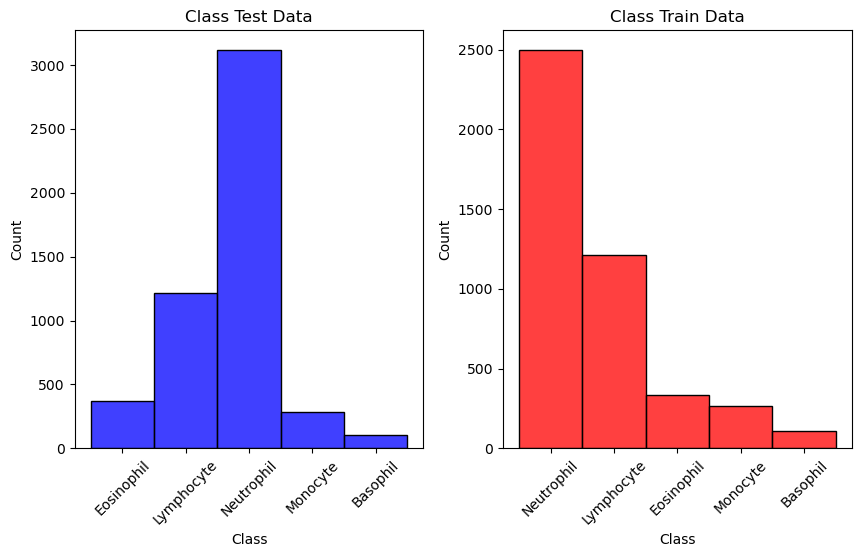

In [20]:
plt.figure(figsize=(13, 10))
plt.subplot(2, 3, 1)
sns.histplot(x=test_data['Class'], color='blue', label='Test Data')
plt.xticks(rotation=45)
plt.title('Class Test Data')
plt.subplot(2, 3, 2)
sns.histplot(x=train_data['Class'], color='red', label='Train Data')
plt.xticks(rotation=45)
plt.title('Class Train Data')
plt.tight_layout()
plt.show()

In [21]:
neutrophilData = test_data[test_data['Class'] == 'Neutrophil']
lymphocyteData = test_data[test_data['Class'] == 'Lymphocyte']
monocyteData = test_data[test_data['Class'] == 'Monocyte']
eosinophilData = test_data[test_data['Class'] == 'Eosinophil']
basophilData = test_data[test_data['Class'] == 'Basophil']

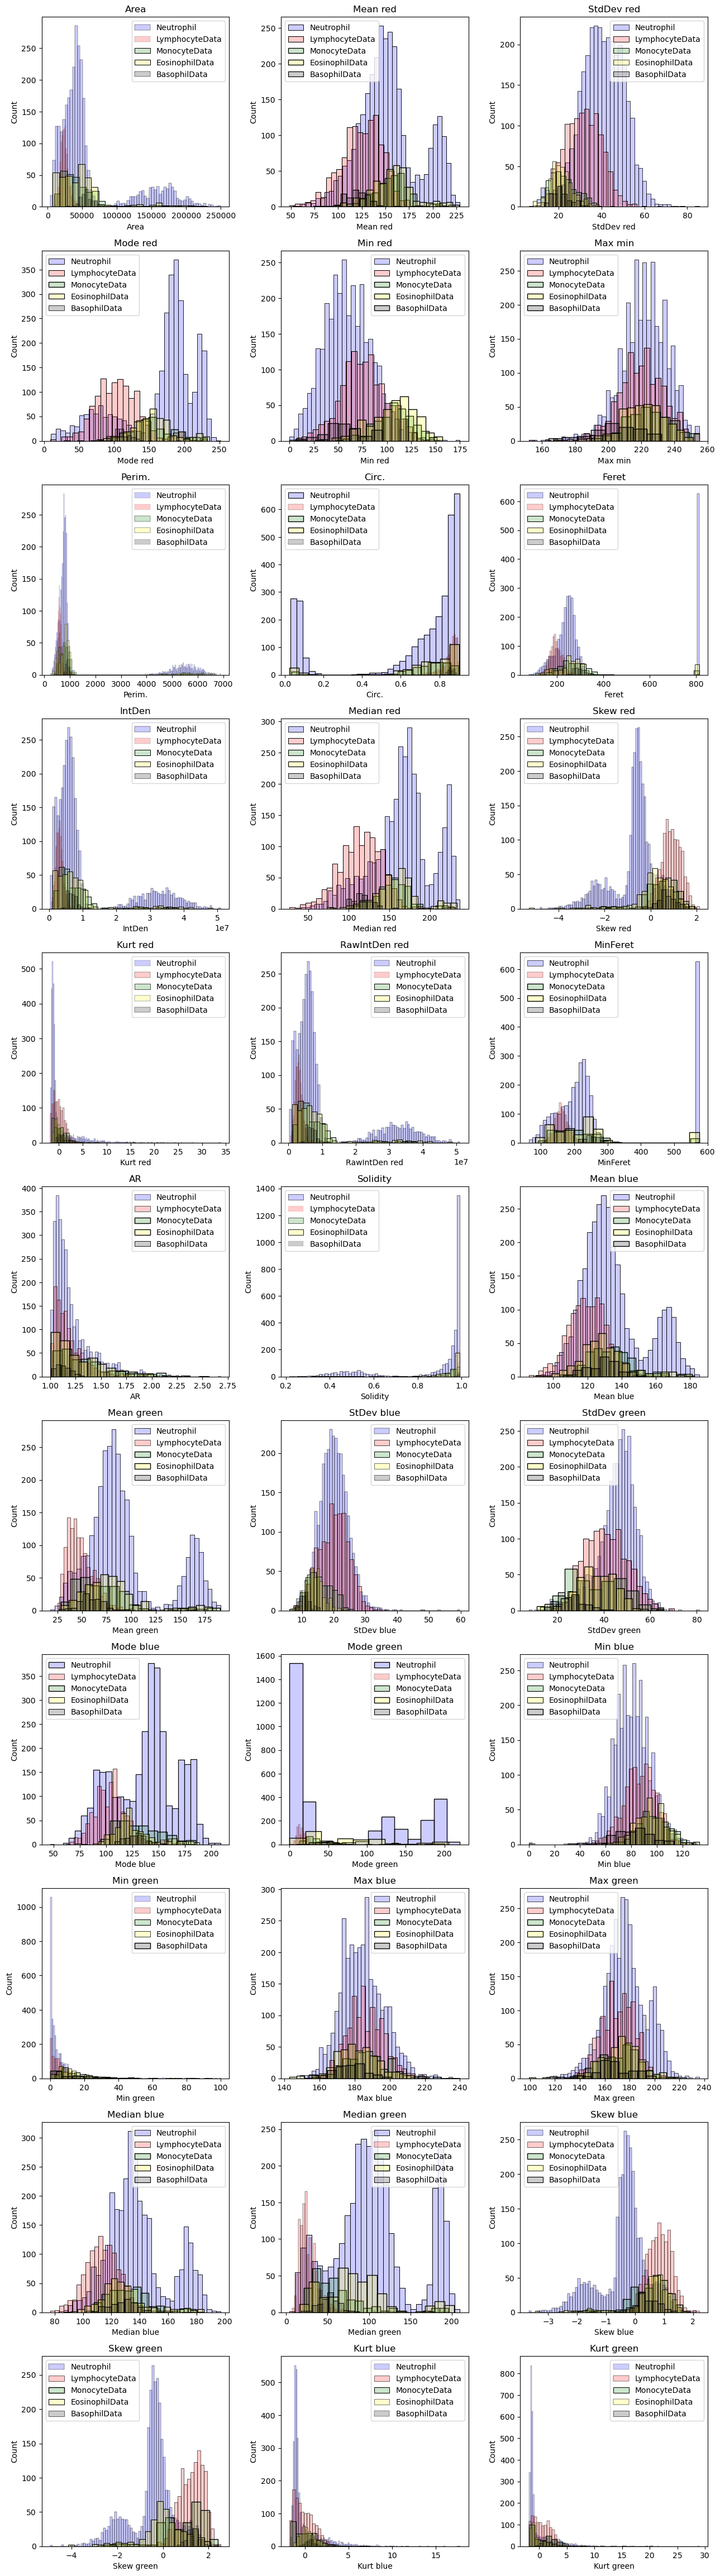

In [22]:

plt.figure(figsize=(13, 50))
for i, col in enumerate(neutrophilData.select_dtypes(include=['number']), 1):
    plt.subplot(12, 3, i)
    sns.histplot(x=neutrophilData[col], color='blue', label='Neutrophil', alpha=0.2)
    sns.histplot(x=lymphocyteData[col], color='red', label='LymphocyteData', alpha=0.2)
    sns.histplot(x=monocyteData[col], color='green', label='MonocyteData', alpha=0.2)
    sns.histplot(x=eosinophilData[col], color='yellow', label='EosinophilData', alpha=0.2)
    sns.histplot(x=basophilData[col], color='black', label='BasophilData', alpha=0.2)
    plt.legend()
    plt.title(col)
    plt.tight_layout()
plt.show()

**Ferret kontrollieren**

In [23]:
AnzahlfalscheDaten = len(test_data[(test_data['Feret'] == 813.173) | (test_data['MinFeret'] == 575)])
print('Anzahl falsche Daten: ', AnzahlfalscheDaten)

Anzahl falsche Daten:  680


In [24]:
test_data = test_data.drop(test_data[test_data['Feret'] == 813.173].index)
test_data = test_data.drop(test_data[test_data['Feret'] == 575.0].index)

In [25]:
AnzahlfalscheDaten = len(test_data[(test_data['Feret'] == 813.173) | (test_data['MinFeret'] == 575)])
print('Neue Anzahl falsche Daten: ', AnzahlfalscheDaten)

Neue Anzahl falsche Daten:  0


**IntDen löschen**

In [26]:
test_data = test_data.drop(columns=['IntDen'])

**Doppete Werte kontrollieren**

In [27]:
test_data[test_data.duplicated()]

Empty DataFrame
Columns: [image filename, Area, Mean red, StdDev red, Mode red, Min red, Max min, Perim., Circ., Feret, Median red, Skew red, Kurt red, RawIntDen red, MinFeret, AR, Solidity, Mean blue, Mean green, StDev blue, StdDev green, Mode blue, Mode green, Min blue, Min green, Max blue, Max green, Median blue, Median green, Skew blue, Skew green, Kurt blue, Kurt green, Class]
Index: []

[0 rows x 34 columns]

In [28]:
duplikate = pd.DataFrame()
for col in test_data.columns:
    if col in train_data.columns:
        duplikate[col] = test_data[col].isin(train_data[col])

gleiche_zeilen = test_data[test_data[duplikate].eq(train_data[duplikate]).all(axis=1)]

print('Anzahl gleiche Zeilen: ', len(gleiche_zeilen))

Anzahl gleiche Zeilen:  0


/tmp/ipykernel_1132/2597778600.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gleiche_zeilen = test_data[test_data[duplikate].eq(train_data[duplikate]).all(axis=1)]


**Eignung zur Modellevaluation**

Meiner Meinung nach ist der Testdatensatz zur Modellevaluation geignet. Es sind keine doppelten Werte in den Datensätzen enthalten, die Verteilungen sind ähnlich und die Klassen sind auch ähnlich verteilt wie im Train-Datensatz.

### Aufgabe 3 - Modell-Evaluation (4 Punkte)

Diskutiere für die vorliegende Problemstellung, welche Metriken zur Evaluation in Frage kommen.  

Welche Vor- und Nachteile haben sie?  

Was für Ansätze gibt es für die Aggregation der Metriken bei mehreren Klassen?  

Disclaimer: Ich habe bei dieser Aufgabe intensiv mit Chantal Giesler zusammengearbeitet.

Das Ziel dieser Minichallenge ist es, ein Modell zu erstellen, welches lernen soll die Klasse von Blutzellen anhand von Features vorherzusagen. Die fünf Klassen müssen OneHotEncoded sein.

Um die Güte von Modellen zu bestimmen kenne ich einige Metriken. Darunter sind der MAE-, MSE- und der R2-Score. In Aufgabe 4 ist noch von F1-Score und Accuracy die rede. 

Im Folgenden diskutiere ich die Metriken für die Modell-Evaluation:

Klassifikationsmatrix:

- Bei logistischen Modellen wird immer die Wahrscheinlichkeit angegeben für eine Vorhersage. Da in realität jedoch oft viele verschiedene und nicht nur zwei Klassen vorhergesagt werden sollen, wird die Klassifikationsmatrix erweitert. Für die Klassifikationsmatrix werden die effektiven Klassen den predicteten Klassen gegenübergestellt. Perfekt wäre das Modell wenn jeder Wert welcher in der Klassifiaktionsmatrix nicht auf der Diagonalen liegt, 0 ist.

- Ein Vorteil der Klassifiaktionsmatrix ist, dass sie einen guten und klaren Überblick über die Qualität der Vorhersagen verschaft. Es ist gut ersichtlich welche Fehler das Modell macht. Beispielsweise kann am ablesen, das die Klasse 1 oft fälschlicherweise als Klasse 3 vorhergesagt wird.

- Nachteil der Klassifikationsmatrix ist, dass sie die Klassengrösse nicht berücksichtig. Auch ist das kein einzelner Wert welcher mit anderen verglichen werden könnte, sondern eine Grafik.

R2: 

- Den R2-Score kann man in unserem Beispiel nicht verwenden. Er ist für kontinuirliche Daten konzipiert. Da beim R2-Score mit den Residuen gerechnet wird und wir mit Wahrscheinlichkeiten rechnen, sagt dieser Score nichts über die Güte unseres Modells aus.

MAE und MSE:
- Auch beim MAE und MSE haben wir ähliche Hindernisse wie beim R2. Da wir mit OneHotEncodeten Werten rechnen, würden wir die Scores manipulieren und sie würden eine nichtsaussagende Zahl ergeben, welche wir nicht vergleichen könnten.

F1-Score:
- Der F1-Score ist folgendermassen zu berechnen: Man berechnet zuerst die Precision mit $ \frac{ True Positives}{True Positives + False Positives }$ und den Recall mit $ \frac{True Positives}{True Positives + False Negatives}$. Dann rechnet man $ 2 * \frac{Precision * Recall} { Precision + Recall}$. Es wird die Balance berechnet zwischen der Trefferquote, also wie gut die Precision ist und wie vollständig die Klassifizierung der Werte ist.

- Vorteil des F1-Scores ist, dass er in ungleich verteilten Datensätzen nutzbar bleibt.

- Nachteil des F1-Scores ist, dass er die True Negatives nicht beachtet. Somit geht eine potentielle Informationsquelle verlohren.

Accuracy:
- Die Accuracy ist der Durchschnitt, wie gut ein Modell bei Precision, Sensitivity, Specifity und Negative Predictive Value abschneidet. Die Formel dazu lautet: $ \frac{ True Positives + True Negatives }{ True Positives + True Negatives + False Positives + False Negatives}$

- Vorteil der Accuracy ist, dass alle potentiellen Informationsquellen verwendet werden.

- Nachteil ist, dass unterschiedliche Klassengrössen das Ergebniss verzerren können.

### Aufgabe 4 - 'Dummy-Klassifikatoren' (6 Punkte)

Wir wollen als Ausgangslage zwei heuristische Klassifikations-Strategien evaluieren:

1. Einen Dummy-Klassifikator, welcher immer das häufigste Label der Trainingsdaten vorhersagt.
2. Einen Dummy-Klassifikator, welcher ein zufälliges Label vorhersagt, jeweils mit der Wahrscheinlichkeit seines Vorkommens in den Trainingsdaten.

Berechne die Overall Accuracy und den ungewichteten mittleren F1-Score auf den Testdaten für beide Strategien.  

Diskutiere das Ergebnis und die resultierenden Einsichten für die folgenden Modell-basierte Ansätze.

In [29]:
train_data

image filename   Area  Mean red  StdDev red  Mode red  Min red  \
0     95-5-10-1_231_1.jpg   36063   101.964      49.394        37       20   
1      95-9-4-4_121_1.jpg    6432    97.806      41.106        53       39   
2      95-5-4-1_182_1.jpg   32524   156.996      23.149       157      100   
3      95-8-13-3_60_2.jpg   25293   124.220      47.617        81       54   
4     95-5-10-1_645_2.jpg   44853   167.199      58.149       219       52   
...                    ...    ...       ...         ...       ...      ...   
5082  95-8-12-5_216_3.jpg   29002   121.817      30.880        98       72   
5083  95-8-24-1_231_1.jpg   20568   134.624      25.069       118       99   
5084  95-8-10-1_578_1.jpg   46598   163.671      35.299       188       80   
5085  95-8-20-3_157_1.jpg   16096   155.947      17.368       146      127   
5086  95-5-10-1_769_1.jpg   28444   134.449      49.344        61       54   

      Max min   Perim.  Circ.    Feret  ...  Min green  Max blue  Max green  \
0         187  774.767  0.755  260.967  ...          0       183        162   
1         190  329.765  0.743  121.672  ...          2       161        127   
2         251  717.696  0.793  252.242  ...         24       186        193   
3         217  609.955  0.854  213.328  ...          0       180        171   
4         239  815.151  0.848  257.329  ...          1       202        181   
...       ...      ...    ...      ...  ...        ...       ...        ...   
5082      233  637.955  0.895  211.405  ...          2       203        181   
5083      229  538.701  0.891  176.366  ...          3       162        155   
5084      223  833.820  0.842  277.723  ...          4       178        175   
5085      207  520.558  0.746  194.610  ...         23       176        149   
5086      230  638.240  0.877  201.022  ...          5       207        170   

      Median blue  Median green  Skew blue  Skew green  Kurt blue  Kurt green  \
0             119            53      0.013       0.155     -1.254      -1.707   
1             100            23      0.699       0.775     -0.741      -0.863   
2             139            55      0.919       1.540      0.531       1.382   
3             124            29      0.148       0.512     -1.438      -1.424   
4             151           123     -0.389      -0.403     -1.333      -1.592   
...           ...           ...        ...         ...        ...         ...   
5082          110            20      0.935       1.299     -0.145       0.284   
5083           94            16      0.881       1.567     -0.269       1.099   
5084          139           113     -0.447      -0.507     -1.003      -1.326   
5085          125            46      0.911       0.893      0.266      -0.649   
5086          130            56      0.276       0.372     -0.921      -1.199   

           Class  
0     Neutrophil  
1     Neutrophil  
2     Lymphocyte  
3     Lymphocyte  
4     Neutrophil  
...          ...  
5082  Lymphocyte  
5083  Lymphocyte  
5084  Neutrophil  
5085  Eosinophil  
5086  Neutrophil  

[4415 rows x 34 columns]

In [30]:
test_data

image filename   Area  Mean red  StdDev red  Mode red  Min red  \
0      95-5-5-1_144_1.jpg   36006   185.347      18.313       170      143   
1     95-8-10-1_644_2.jpg   20943   109.698      46.423        70       51   
3     95-8-10-1_496_1.jpg   48803   178.445      34.258       209       91   
4      95-8-3-1_205_1.jpg   20789   112.581      28.582       102       71   
5     95-7-24-2_485_1.jpg   43042   153.928      43.813       186       60   
...                    ...    ...       ...         ...       ...      ...   
5083  95-7-24-2_278_1.jpg   19946   138.723      26.227       123       73   
5084  95-8-10-1_497_1.jpg   22352   128.748      39.268       161       56   
5085   95-8-22-2_25_1.jpg   19346   116.282      36.247        82       69   
5086   95-8-8-2_221_1.jpg   24972   120.121      40.471        86       65   
5087   95-8-3-1_519_1.jpg   49429   148.533      49.045       183       32   

      Max min   Perim.  Circ.    Feret  ...  Min green  Max blue  Max green  \
0         231  875.879  0.590  282.986  ...         31       166        169   
1         233  562.299  0.832  196.492  ...          0       178        160   
3         231  834.649  0.880  259.417  ...          9       175        176   
4         209  548.742  0.868  181.532  ...          4       174        158   
5         219  818.791  0.807  245.400  ...          4       184        175   
...       ...      ...    ...      ...  ...        ...       ...        ...   
5083      224  536.399  0.871  182.455  ...          4       176        157   
5084      200  603.477  0.771  205.361  ...          5       172        175   
5085      210  669.193  0.543  226.808  ...          8       181        163   
5086      245  600.198  0.871  184.391  ...          4       192        195   
5087      216  834.708  0.892  259.717  ...          0       184        181   

      Median blue  Median green  Skew blue  Skew green  Kurt blue  Kurt green  \
0             131            97      0.307       0.056     -0.741      -1.471   
1              91            15      0.739       1.644     -0.337       1.599   
3             138           121     -0.432      -0.492     -0.957      -1.351   
4             111            19      0.893       1.661     -0.095       1.705   
5             142           113     -0.415      -0.482     -0.995      -1.330   
...           ...           ...        ...         ...        ...         ...   
5083          114            24      0.872       1.580      0.282       1.626   
5084          140            96     -0.276      -0.153     -1.136      -1.506   
5085          109            25      1.003       1.246      0.109       0.194   
5086          113            22      0.574       0.927     -1.197      -0.592   
5087          149           122     -0.793      -0.749     -0.605      -1.023   

           Class  
0     Eosinophil  
1     Lymphocyte  
3     Neutrophil  
4     Lymphocyte  
5     Neutrophil  
...          ...  
5083  Lymphocyte  
5084  Neutrophil  
5085  Neutrophil  
5086  Lymphocyte  
5087  Neutrophil  

[4408 rows x 34 columns]

In [31]:
train_data['Class'].value_counts()

Neutrophil    2497
Lymphocyte    1210
Eosinophil     334
Monocyte       268
Basophil       106
Name: Class, dtype: int64

In [32]:
def dummyClassifier(method, data):
    if method == 'most_frequent':
        return data['Class'].value_counts().index[0]
    elif method == 'stratified':
        np.random.seed(0)
        y_train = data['Class']
        class_counts = y_train.value_counts()
        class_probabilities = class_counts / class_counts.sum()
        return np.random.choice(class_probabilities.index, size=data.shape[0], p=class_probabilities)
    else:
        raise ValueError('Invalid method')

In [33]:
dummyClassifier('most_frequent', train_data)

'Neutrophil'

In [34]:
dummyClassifier('stratified', train_data)

array(['Neutrophil', 'Lymphocyte', 'Lymphocyte', ..., 'Neutrophil',
       'Neutrophil', 'Lymphocyte'], dtype=object)

In [35]:
def calculate_accuracy(y_true, y_pred):
    # Anzahl der korrekten Vorhersagen
    correct_predictions = np.sum(y_true == y_pred)
    # Gesamtanzahl der Vorhersagen
    total_predictions = len(y_true)
    # Berechnung der Genauigkeit
    accuracy = correct_predictions / total_predictions
    return accuracy

In [36]:
def precision_recall_f1(y_true, y_pred, class_label):
    true_positive = np.sum((y_true == class_label) & (y_pred == class_label))
    false_positive = np.sum((y_true != class_label) & (y_pred == class_label))
    false_negative = np.sum((y_true == class_label) & (y_pred != class_label))

    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    return precision, recall, f1
def unweighted_f1_score(y_true, y_pred):
    classes = np.unique(y_true)
    f1_scores = []

    for class_label in classes:
        _, _, f1 = precision_recall_f1(y_true, y_pred, class_label)
        f1_scores.append(f1)

    return np.mean(f1_scores)

In [37]:
y_pred_most_frequent = dummyClassifier('most_frequent', test_data)
y_pred_stratified = dummyClassifier('stratified', test_data)

accuracyMostFrequent = calculate_accuracy(test_data['Class'], y_pred_most_frequent)
accuracyStratified = calculate_accuracy(test_data['Class'], y_pred_stratified)
f1MostFrequent = unweighted_f1_score(test_data['Class'], y_pred_most_frequent)
f1Stratified = unweighted_f1_score(test_data['Class'], y_pred_stratified)




print('Accuracy most frequent: ', accuracyMostFrequent)
print('Accuracy stratified: ', accuracyStratified)
print('F1 most frequent: ', f1MostFrequent)
print('F1 stratified: ', f1Stratified)

Accuracy most frequent:  0.5648820326678766
Accuracy stratified:  0.41424682395644286
F1 most frequent:  0.1443896781675848
F1 stratified:  0.20438366270838113


In [38]:
accuracys.update({'Accuracy most frequent': accuracyMostFrequent})
accuracys.update({'Accuracy stratified': accuracyStratified})
f1_scores.update({'F1 most frequent': f1MostFrequent})
f1_scores.update({'F1 stratified': f1Stratified})

**Diskussion**

Da bei der Bewertung mit Accuracy die Klassengrösse eine Rolle spielt, ist diese beim Klassifikator 'Most frequent' besser, da ca. 60% der Daten der Klasse Neutrophil angehören. Bei der Bewertung mit F1-Score ist der Klassifikator 'Stratified' besser, da er die Klassen ungleichmässig verteilt.
Allgemein sind jedoch beide Dummy-Klassifikatoren nicht gut, da es rein auf der Verteilung der Klassen im Traindatenset basiert und nicht mithilfe der Features die Klassen vorhersagt. 

### Aufgabe 5 - Logistic Regression (5 Punkte)

Als Baseline-Modell zur Vorhersage der Blutzellentypen verwenden wir logistische Regression.  

Setze einen einfachen, sinnvoll regularisierten, rein linearen logistischen Regressionsansatz um. Optimiere für F1-Score.  
Verwende dazu scikit-learn.  

Evaluiere das Modell auf dem Testdatensatz im Sinne der Overall Accuracy sowie des ungewichteten mittleren F1-Scores und zeichne die Confusion Matrix.  

Diskutiere das Ergebnis.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy:  0.5794010889292196
F1 unweighted:  0.22076700375268893


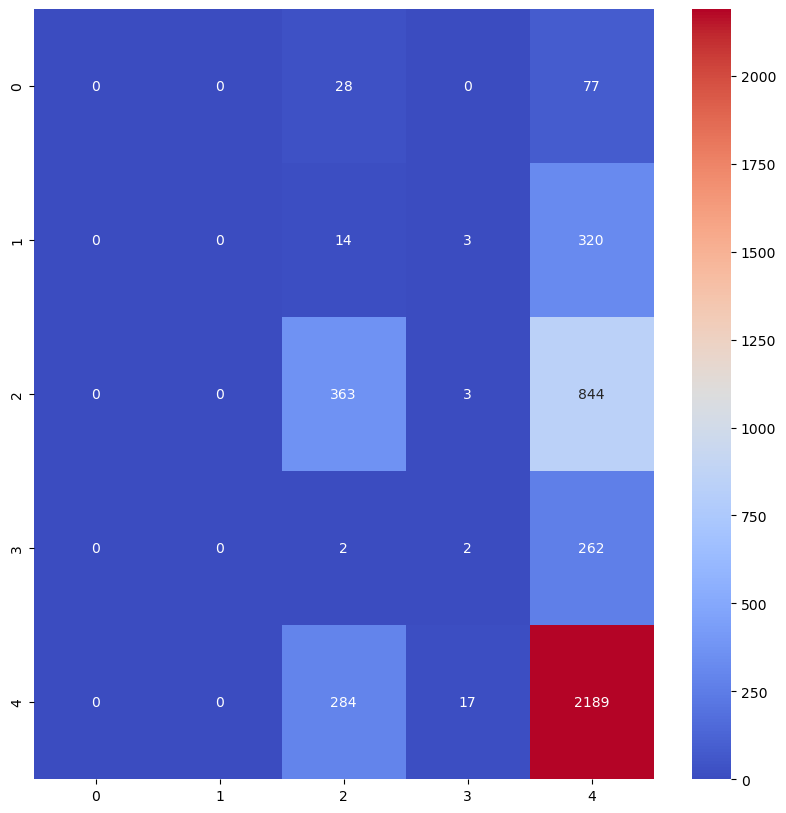

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

X_train = train_data.drop(columns=['image filename', 'Class'])
y_train = train_data['Class']
X_test = test_data.drop(columns=['image filename', 'Class'])
y_test = test_data['Class']


logistic_regression = LogisticRegression(random_state=123)


grid_params = {
    'C': [0.1,  0.5, 0.7, 0.8, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'saga']
}

grid_search = GridSearchCV(logistic_regression, grid_params, cv=5, scoring='f1_macro', n_jobs=-1)


grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 unweighted: ', f1_score(y_test, y_pred, average='macro'))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='coolwarm')
plt.show()

**Diskusion**
Das Modell ist erstaunlich schlecht. Es sagt hauptsächlich Klasse 4 vorher. Jedoch kommt Klasse vier mit Abstand am häufigsten vor. 

In [40]:
accuracys.update({'Accuracy Logistic Regression': accuracy_score(y_test, y_pred)})
f1_scores.update({'F1 Logistic Regression': f1_score(y_test, y_pred, average='macro')})

### Aufgabe 6 - Multi-Layer Perceptron (15 Punkte)

Implementiere ein Multi-Layer Perceptron mit Sigmoid Aktivierungsfunktionen zur Multi-Klass Klassifikation.

Dabei sollen min. Architektur (# layers / units per layer), Regularisierung ($\alpha$), learning rate ($\eta$), und Batch-Size konfigurierbar sein. 

Initialisiere die Gewichte zufällig mit kleinen Werten, z.B. aus dem Intervall $[-0.7, 0.7]$. Dabei sollst du sicherstellen, dass der Fit der Modelle reproduzierbar ist. Setze also _random seeds_ um die Initialisierung der Gewichte reproduzierbar zu machen [siehe numpy](https://numpy.org/doc/stable/reference/random/index.html#random-quick-start).  

Ergänze dazu die vorgegebene Klasse.

#### Kostenfunktion

Es soll folgende Kostenfunktion $J$ minimiert werden (_cross-entropy_ mit Regularisierung):

\begin{align}
J(\mathbf{w}) &= \frac{1}{N}\sum_{i=1}^{N} \sum_{k=1}^{K} \Big(- y_k^{(i)} \log \hat{y}_k^{(i)} \Big) + C \\
C &= \frac{\alpha}{2} \sum_{l=1}^{L}\sum_{j=1}^{u^{(l)}} \sum_{i=1}^{u^{(l-1)}} (w^{(l)}_{ij})^2
\end{align}

#### Notation

- $N$: Anzahl Datenpunkte
- $L$: Anzahl Layer (ohne Input-Layer)
- $K$: Anzahl Klassen
- $p$: Anzahl Input Features
- $\alpha$: Regularisierungsfaktor
- $\mathbf{a}^{(l)}$ Aktivierungen im Layer $l$ (l=0 ist Input-Layer)
- $\mathbf{z}^{(l)}$ pre-activations / logits im Layer $l$

- $\mathbf{y}^{(i)} \in \{0, 1\}$: One-hot encoded Vektor mit Dimensionalität $\mathbb{R}^K$, Eintrag 1 indiziert die Klassenzugehörigkeit
- $\hat{y}_k^{(i)}$ Prediction für Klasse $k$, $P(Y=k| x^{(i)})$ 
- $w^{(l)}_{ij}$: Gewicht / Parameter $ij$ von Layer $l$
- $W^{(l)}$ Parameter von Layer $l$ mit $\in \mathbb{R}^{u^{(l-1)} \times u^{(l)}}$ oder mit Bias $\mathbb{R}^{(u^{(l-1)}+1) \times u^{(l)}}$
- $u^{(l)}$: Anzahl Nodes (units) im Layer $l$, ohne Bias Node
- $g()$: Aktivierungsfunktion


#### Forward Pass

Exemplarisch für einen Datenpunk $\mathbf{x}^{(i)}$. Wir nehmen an, dass der Bias als 1-er Spalte eingefügt wurde $x_0^{(i)}=1$.

\begin{align*}
\mathbf{a}^{(0)} &= \mathbf{x}^{(i)} \\
\mathbf{z}^{(1)} &= \mathbf{a}^{(0)T}W^{(1)} \\
\mathbf{a}^{(1)} &= g(\mathbf{z}^{(1)}) \\
.. &= .. \\
\mathbf{z}^{(l)} &= \mathbf{a}^{(l-1)T}W^{(l)} \\
\mathbf{a}^{(l)} &= g(\mathbf{z}^{(l)}) \\
.. &= .. \\
\mathbf{\hat{y}}_k^{(i)} &= a_k^{(L)} \\
g(\mathbf{z}^{(l)}) &=  \frac{1}{1+e^{-z^{(l)}}} & \text{Sigmoid Aktivierungsfunktion für Hidden-Layers } (l \lt L)  \\
a_i^{(L)} &= \sigma(\mathbf{z}^{(L)})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} & \text{ Softmax-Funktion for } l = L
\end{align*}

#### Backpropagation

Backpropagation ist der zentrale Algorithmus beim Trainieren von Neuronalen Netzwerken um die partiellen Ableitung der Loss-Funktion bezüglich der Parameter zu berechnen. Dabei wird der Gradient der Loss-Funktion vom Output des Netzwerkes mit Hilfe der Kettenregel zurückpropagiert. Du sollst diesen Algorithmus anwenden, um alle $\frac{\partial J}{\partial \mathbf{w_{ij}^{(l)}}}$ zu bestimmen. Folgende Zusammenhänge sind hilfreich bei der Implementation:


\begin{align*}
\frac{\partial a^{(l)}}{\partial z^{(l)}} &= g(z^{(l)})(1 - g(z^{(l)})) = a^{(l)} \odot (1- a^{(l)}) & \text{for } l \lt L\\
\frac{\partial z^{(l)}}{\partial a^{(l-1)}} &= W^{(l)} \\
\frac{\partial z^{(l)}}{\partial W^{(l)}} &= a_i^{(l-1)}
\end{align*}


Man kann den Gradienten der Kostenfunktion bezüglich der Gewichte $W$ rekursiv bestimmen:

\begin{align*}
\frac{\partial J}{\partial \mathbf{z}^{(L)}} &= \delta^{(L)} = \mathbf{\hat{y}} - \mathbf{y} & \text{inizialisiere backprop hiermit. }\\
\delta^{(l)} &= \Big(\frac{\partial z^{(l+1)}}{\partial a^{(l)}} \delta^{(l+1)} \Big) \odot \frac{\partial a^{(l)}}{\partial z^{(l)}} & \text{berechne die backprop-Schritte iterativ für } l \lt L \\
\frac{\partial J}{\partial W^{(l)}} &=  \Big(\frac{\partial z^{(l)}}{\partial W^{(l)}}\Big)^T \delta^{(l)}  & \text{dies sind die Gradienten der Gewichte!}
\end{align*}




Wenn du mehr dazu lesen möchtest, findest Du eine gute Herleitung hier:

- [CS229 Stanford](https://cs229.stanford.edu/notes2020spring/cs229-notes-deep_learning.pdf)

Zum Thema Backpropagation gibt es ausserdem ausgezeichnete Videos:

- [3Blue1Brown Video 1](https://youtu.be/IHZwWFHWa-w)

- [3Blue1Brown Video 2](https://youtu.be/Ilg3gGewQ5U)



#### Vektorisierung

Wir können den Forward-Pass und die Backpropagation effizient berechnen, indem wir die Operationen vektorisieren. Wir berechnen die Aktivierungen direkt für alle Datenpunkte $N$. Die Bias-Vektoren $\mathbf{b}$ werden direkt in die Aktivierungs-Matrizen hinzugefügt. Auch die Backpropagation lässt sich vektorisieren, wir berechnen dann den durchschnittlichen Gradienten über alle Datenpunkte. Ohne Vektorisierung wird deine Implementation zu langsam sein. Hier der Ablauf für die Forward-Propagation:


\begin{align*}
\mathbf{X} & \in \mathbb{R}^{N \times (p + 1)} \\
\mathbf{A}^{(l)} & \in \mathbb{R}^{N \times (u^{(l)} + 1)} \\
\mathbf{Z}^{(l)} & \in \mathbb{R}^{N \times (u^{(l)})} \\
\mathbf{W}^{(l)} & \in \mathbb{R}^{(u^{(l-1)} + 1) \times u^{(l)}} \\
\mathbf{b}^{(l)} & \in \mathbb{R}^{u^{(l)} \times 1} \\
\mathbf{Z}^{(1)} &= \mathbf{X} \mathbf{W}^{(1)} \\
\mathbf{A}^{(1)} &= g( \mathbf{Z}^{(1)}) & \text{add bias node if necessary}\\
... \hspace{4pt} &= \hspace{4pt} ... \\
\mathbf{A}^{(L)} &= g( \mathbf{Z}^{(L)}) & \text{no bias at output}\\
\end{align*}


Folgende Grafik zeigt illustrativ die Struktur von einem MLP. Beachte auch die eingefügten Bias-Nodes (orange), die nur mit Neuronen im nächsten Layer verbunden sind.

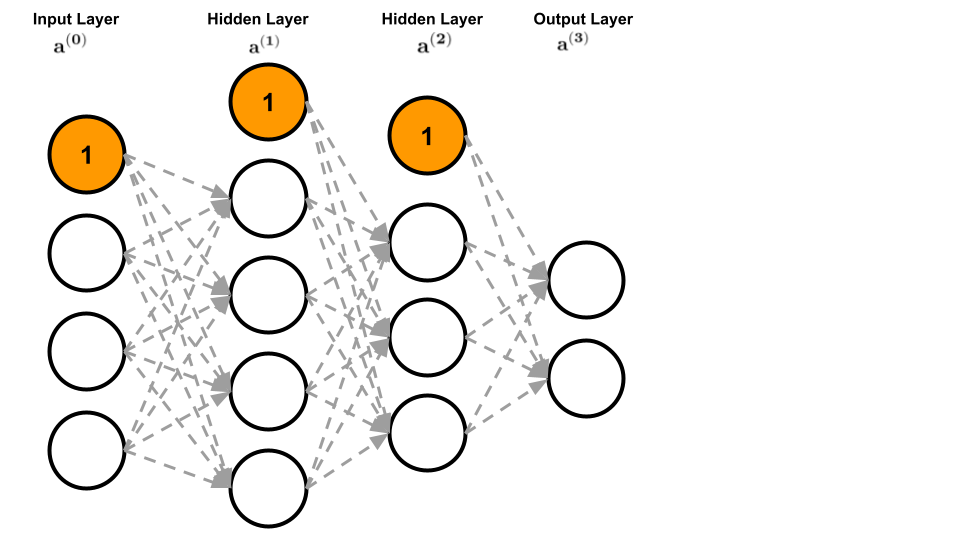

In [41]:
from IPython.display import Image
Image(filename='mlp.png') 

In [42]:
import copy
from itertools import islice
from typing import List, Tuple, Union, Iterable

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

from sklearn.base import BaseEstimator
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from scipy.optimize import minimize
import time
import pylab as pl
from IPython import display


class MLPClassifier(BaseEstimator):
    """ Multi-Layer Perceptron for Classifikation
    
        Args:
            num_nodes_per_layer: List with the number of nodes per layer
                 - including input-layer (features)
                 - no bias nodes should be included
                 - example: [10, 5, 2] -> 10 Features, 5 Nodes in 1st Hidden Layer, 2 Output Nodes
    
            lr: initial learning rate (float)
    
            alpha: L2 Regularization strength (float)
            
            batch_size: number of samples to use for one update 
                - set to None for batch gradient descent (all samples)
        
            max_num_steps: max number of steps (gradient updates)
            
            weights_init_range: Tuple of two floats. 
                - The interval on which the weights will be randomly initialized
                
            adaptive_lr_constant: Adpative learning rate constant
                - lr_new = lr * exp(-adaptive_lr_constant * step)
                - disable with 0.0
    
            min_lr: Minimum Learning Rate, relevant when using adaptive_lr_constant > 0.0
            
            random_seed: random seed for weights initialization (int)
    """
    def __init__(
        self, 
        num_nodes_per_layer: List[int],
        lr: float=0.01,
        alpha: float=0.0,
        batch_size: Union[int, None]=None,
        max_num_steps: int=1000,
        weights_init_range: Tuple[float, float]=(-0.7, 0.7),
        adaptive_lr_constant: float=0.0,
        min_lr: float=1e-7,
        random_seed: int=123
    ):
        
        #self.network = [
        #    layer1[
        #        node1[
        #            weights[...],
        #            bias
        #        ]
        #    ]
        #]
        
        ### BEGIN SOLUTION
        self.alpha = alpha
        self.lr = lr
        self.batch_size = batch_size
        self.max_num_steps = max_num_steps
        self.weights_init_range = weights_init_range
        self.adaptive_lr_constant = adaptive_lr_constant
        self.min_lr = min_lr
        self.random_seed = random_seed
        self.num_nodes_per_layer = num_nodes_per_layer
        self.layers = []
        self.outputlayer = []
        self.costs = []
        self.accuracy = []
        ### END SOLUTION
        
    def _initialize_weights(self):
        """ Initialize Model-Parameters W """
        ### BEGIN SOLUTION
        for layer in range(1,len(self.num_nodes_per_layer)-1):
            self.layers.append(self.createLayer(self.num_nodes_per_layer[layer], self.num_nodes_per_layer[layer-1]))
        self.outputlayer.append(self.createLayer(self.num_nodes_per_layer[-1], self.num_nodes_per_layer[-2]))
        ### END SOLUTION

    
    def forward(self, X: np.ndarray) -> List[np.ndarray]:
        """ forward pass - calculate all activations
            Args:
                X: Input-Activations [num_samples, num_features]
    
            Returns: List of Layer-Activations
        """
        ### BEGIN SOLUTION
        tempResult = X
        activations = []
        activations.append(tempResult)
        for layer in self.layers:
            tempResult = self.calculateForward(tempResult, layer)
            activations.append(tempResult)
        tempResult = self.calculateForwardOutput(tempResult, self.outputlayer[0])
        activations.append(tempResult)
        return activations
        ### END SOLUTION
    
    def backward(self, activations: List[np.ndarray], delta_upstream: np.ndarray) -> List[np.ndarray]:
        """ backward pass / backpropagation - Calculate partial derivatives of model weights
            Args:
                activations: List of Layer Activations, Output of forward()
        
                delta_upstream: Matrix with partial derivatives of Loss functions wrt. 
                    logits of last layer[num_samples, num_outputs]
    
            Returns: List of Layer-Gradients
        """
        ### BEGIN SOLUTION
        gradients = []
        gradientsBias = []
        layers = self.layers.copy()
        layers.append(self.outputlayer[0])

        # Starte mit dem Fehler der Ausgangsschicht, der sich direkt aus delta_upstream ergibt
        delta = delta_upstream
        
        #Schleife über alle Schichten rückwärts
        for l in range(len(self.layers), -1, -1):
            #Berechne den Gradienten für die Gewichte dieser Schicht

            grad_w = np.dot(activations[l].T, delta)/activations[l].shape[0]
            grad_b = np.sum(delta, axis=0, keepdims=True)

            #Regularisierungsterm hinzufügen (nur für die Gewichte, nicht für den Bias)
            grad_w = grad_w + (self.alpha * layers[l][0])
    
            #Füge den berechneten Gradienten zur Liste hinzu
            gradients.insert(0, grad_w)
            gradientsBias.insert(0, grad_b)
            
            if l != 0:
                #Berechne den Fehler für die nächste Schicht
                delta = np.dot(delta, layers[l][0].T) * (self.sigmoid(activations[l]) * (1 - self.sigmoid(activations[l])))
        
        return gradients, gradientsBias
    
        ### END SOLUTION
    
    def fit(
            self,
            X: np.ndarray, y: np.ndarray,
            X_val: Union[np.ndarray, None]=None,
            y_val: Union[np.ndarray, None]=None,
            validate_after_every_num_steps: int=20) -> None:
        """ Fit Model Parameters
            Args:
                X, y: Training-Data
                X_val, y_val: (Optional) Validation-Data
                validate_after_every_num_steps: (Optional) Validation after every xth step
        """
        ### BEGIN SOLUTION
        # Initialisieren der Gewichte
        self._initialize_weights()
        
        # Initialisieren der besten Kosten als unendlich
        best_cost = float('inf')
        no_improvement_count = 0
        batches = self.generate_batches(X, y, self.batch_size)
        valBatches = self.generate_batches(X_val, y_val, self.batch_size)
        # Trainingsschleife
        for step in tqdm(range(self.max_num_steps)):
            # Berechne aktuelle Lernrate (adaptive Lernrate, falls verwendet)
            current_lr = self.lr * np.exp(-self.adaptive_lr_constant * step)
            current_lr = max(current_lr, self.min_lr)
            
            # Erzeuge Batches
            X_batch, y_batch = next(batches)
            
            # Forward-Pass
            activations = self.forward(X_batch)
            # Berechne den Fehler und Gradienten
            costs = self.calculate_cost(y_batch, activations[-1])
            self.costs.append(costs)
            self.accuracy.append(self.score(X_batch, y_batch))
            delta_upstream = self.calculate_gradient_of_cost_function(y_true=y_batch, y_pred=activations[-1])
            gradients, gradientsBias = self.backward(activations=activations, delta_upstream=delta_upstream)
            # Update der Gewichte
            for l in range(len(self.layers)):
                self.layers[l][0] -= current_lr * gradients[l]  # Update der Gewichte
                self.layers[l][1] = self.layers[l][1] - (current_lr * gradientsBias[l])  # Update des Bias
         
            X_valBatch, y_valBatch = next(valBatches)
            # Optional: Validierung
            if X_valBatch is not None and y_valBatch is not None and step % validate_after_every_num_steps == 0:
                y_val_pred = self.predict_proba(X_valBatch)
                val_cost = self.calculate_cost(y_valBatch, y_val_pred)
                print(f"Validation cost after step {step}: {val_cost}")
                print(f"Validation accuracy after step {step}: {self.score(X_valBatch, y_valBatch)}")
                
                # Optional: Frühzeitiges Beenden, wenn keine Verbesserung
                if val_cost < best_cost:
                    best_cost = val_cost
                    no_improvement_count = 0
                else:
                    no_improvement_count += 1
                    if no_improvement_count > 20:
                        print("Early stopping due to no improvement")
                        #break
        ### END SOLUTION
        
    def calculate_cost(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        """ Calculate Cross-Entropy cost """
        N = y_true.shape[0]
        # Cross-Entropy-Komponente
        cross_entropy = -np.sum(y_true * np.log(y_pred + 1e-7)) / N
        regularization = 0
        # Regularisierungsterm
        for layer in self.layers:
            regularization += (np.sum(layer[0]**2) + np.sum(layer[1]**2)) * (self.alpha / 2)
        # Gesamtkosten
        regularization += (np.sum(self.outputlayer[0][0]**2) + np.sum(self.outputlayer[0][1]**2)) * (self.alpha / 2)
        total_cost = cross_entropy + regularization

        return total_cost
    
    
    def calculate_gradient_of_cost_function(self, y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
        """ Calculate gradient of cost function w.r.t logits dJ/dZ """
        ### BEGIN SOLUTION
        return y_pred - y_true
        ### END SOLUTION
    
    def softmax(self, x: np.ndarray) -> np.ndarray:
        """ Softmax along last dimension: x is of shape [num_samples, num_classes] """
        ### BEGIN SOLUTION
        small = x - np.max(x, axis=1, keepdims=True) # keine Overflow Errors
        exp = np.exp(small)
        base = np.sum(exp, axis=1, keepdims=True)
        normalisiert = exp / base
        return normalisiert
        ### END SOLUTION

    def sigmoid(self, x: np.ndarray) -> np.ndarray:
        """ Sigmoid activation function """
        ### BEGIN SOLUTION
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
        ### END SOLUTION
    
    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """ All class probabilities per sample
            -> input shape  [num_samples, num_features]
            -> output shape [num_samples, num_classes]
        """
        ### BEGIN SOLUTION
        return self.forward(X)[-1]
        ### END SOLUTION        

    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Return most likely class per sample
           -> input shape  [num_samples, num_features]
           -> output shape [num_samples, 1]
        """
        ### BEGIN SOLUTION
        return np.argmax(self.predict_proba(X), axis=-1)
        ### END SOLUTION

    def score(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """ Calculate Accuracy """
       # Vorhersagen als Klasse mit höchster Wahrscheinlichkeit
        predicted_indices = self.predict(X)
    
        # Umwandlung der tatsächlichen Werte in Indizes, falls in One-Hot-Codierung
        if y.ndim > 1 and y.shape[1] > 1:
            true_indices = np.argmax(y, axis=1)
        else:
            true_indices = y
    
        # Berechnung der Genauigkeit mit Vektoroperationen
        correct_predictions = np.sum(predicted_indices == true_indices)
        total_predictions = len(y)
        return correct_predictions / total_predictions
        ### END SOLUTION

    def generate_batches(
            self, X: np.ndarray, y: np.ndarray,
            batch_size: Union[int, None],
            shuffle: bool=True) -> Iterable[Tuple[np.ndarray, np.ndarray]]:
        """ Generate batches of data [BATCH_SIZE, NUM_FEATURES]"""
        
        # Batch Gradient Descent
        if not batch_size:
            batch_size = X.shape[0]
            while True:
                yield X, y
        
        # Flexible Batch-Size that works with batch_size != None
        while True:
            # randomly shuffle input data
            shuffled_indices = np.arange(X.shape[0])
            if shuffle:
                np.random.shuffle(shuffled_indices)
            
            # iterate over batches
            iter_indices = np.arange(X.shape[0])
            slices = islice(iter_indices, 0, None, batch_size)

            # select batches
            for start_index in slices:
                indices_to_select = shuffled_indices[start_index: start_index+batch_size]
                yield X[indices_to_select, :], y[indices_to_select, :]
    
    def grad_check(
            self, X: np.ndarray, y: np.ndarray,
            epsilon: float=0.0001,
            decimal: int=3,
            verbose: bool=False) -> None:
        """Compare the gradient with finite differences around current point in parameter space
            Args:
                X, y: Data
                epsilon: step to take around current parameters
                decimal: verify equality if approximaton is within +- 1e-<decimal>
        """
        # calculate gradient
        activations = self.forward(X)
        y_hat = activations[-1]
        delta_upstream = self.calculate_gradient_of_cost_function(y, y_hat)
        gradients = self.backward(activations, delta_upstream)
        
        # approximate gradient
        gradients_approx = copy.deepcopy(gradients)
        original_layers = copy.deepcopy(self.weights_)
        
        # Iterate over each parameter of the network
        for i, weights in enumerate(self.weights_):
            for j, _ in enumerate(weights.flat):
                
                # generate copy of original parameters for modification
                modified_layers = copy.deepcopy(original_layers)
          
                # assign modified layers for use in other methods
                self.weights_ = modified_layers
                
                # J(theta + epsilon)
                modified_layers[i].flat[j] += epsilon
                y_hat = self.predict_proba(X)
                cost_plus_epsilon = self.calculate_cost(y, y_hat)
                
                # J(theta - epsilon)
                modified_layers[i].flat[j] -= 2 * epsilon           
                y_hat = self.predict_proba(X)
                cost_minus_epsilon = self.calculate_cost(y, y_hat)
                
                # Approx gradient with:
                # (J(theta + epsilon) - J(theta - epsilon)) / (2 * epsilon)
                grad_approx = (
                    (cost_plus_epsilon - cost_minus_epsilon) / 
                    (2 * epsilon))

                gradients_approx[i].flat[j] = grad_approx
                
        # reset layers attribute
        self.weights_ = copy.deepcopy(original_layers)
        
        # normalize gradients
        gradients_approx = [x / np.linalg.norm(x) for x in gradients_approx]
        gradients = [x / np.linalg.norm(x) for x in gradients]
                

        if verbose:
            print('approx : ', gradients_approx)
            print('calc : ', gradients )
        
        for approx, calculated in zip(gradients_approx, gradients):
            np.testing.assert_array_almost_equal(approx, calculated, decimal=decimal)
        print(f"Gradients within +- 1e-{decimal} of approximated gradient!")

    # Additional Methods for your convenience (optional)
    ### BEGIN SOLUTION
    
    def createLayer(self, num_nodes, num_inputs):
        np.random.seed(self.random_seed)
        weights = np.random.uniform(self.weights_init_range[0], self.weights_init_range[1], (num_inputs, num_nodes))
        #weights = np.random.randn(num_inputs, num_nodes)
        bias = np.random.uniform(self.weights_init_range[0], self.weights_init_range[1], (1, num_nodes)) #EVTL 1er vektor
        layer = [weights, bias]
        return layer
    
    def calculateForward(self, X, layer):
        z = X.dot(layer[0]) + layer[1]
        a = self.sigmoid(z)
        return a
    
    def calculateForwardOutput(self, X, layer):
        z = X.dot(layer[0]) + layer[1]
        a = self.softmax(z)
        return a
    
    def flatten_parameters(self):
        """ Flatten all parameters (weights and biases) into a single vector. """
        flat_parameters = []
        for layer in self.layers + [self.outputlayer[0]]:
            flat_parameters.extend(layer[0].ravel())  # Flatten weights
            flat_parameters.extend(layer[1].ravel())  # Flatten biases
        return np.array(flat_parameters)

    def unflatten_parameters(self, flat_parameters):
        """ Convert the flat parameter vector back into the original structure. """
        new_layers = []
        idx = 0
        for layer in self.layers + [self.outputlayer[0]]:
            weight_shape = layer[0].shape
            bias_shape = layer[1].shape
    
            weight_size = np.prod(weight_shape)
            bias_size = 1*bias_shape[1]
    
            weights = flat_parameters[idx:idx + weight_size].reshape(weight_shape)
            idx += weight_size
    
            biases = flat_parameters[idx:idx + bias_size].reshape(bias_shape)
            idx += bias_size
    
            new_layers.append([weights, biases])
        
        self.layers = new_layers[:-1]
        self.outputlayer = [new_layers[-1]]
    
    def compute_cost(self, flat_parameters, X, y):
        """ Compute the cost for the given parameters. """
        self.unflatten_parameters(flat_parameters)
        activations = self.forward(X)
        cost = self.calculate_cost(y, activations[-1])
        return cost
    
    def compute_gradients(self, flat_parameters, X, y):
        """ Compute gradients for the given parameters. """
        self.unflatten_parameters(flat_parameters)
        activations = self.forward(X)
        delta_upstream = self.calculate_gradient_of_cost_function(y, activations[-1])
        gradients, gradientsBias = self.backward(activations, delta_upstream)
        # Flatten the gradients
        flat_gradients = np.concatenate([g.ravel() for g in gradients + gradientsBias])
        return flat_gradients

    def optimize_parameters(self, X, y):
        """ Optimize the parameters using scipy.optimize.minimize. """
        self._initialize_weights()
        initial_parameters = self.flatten_parameters()
        result = minimize(fun=self.compute_cost,
                          x0=initial_parameters, 
                          args=(X, y), 
                          method='L-BFGS-B', 
                          jac=self.compute_gradients)
        self.unflatten_parameters(result.x)
        return result

    ### END SOLUTION


Zeige anhand des kleinen Entwicklungsdatensatzes (`dev_data.csv`), dass deine Implementierung funktioniert, indem du die Output-Variable $y \in \{0, 1, 2\}$ anhand der Input-Variablen $\mathbf{x} = \left(x_1, x_2\right)$ vorhersagen kannst.  
Erzeuge dazu ein Netzwerk mit 2 Hidden Layern mit je 20 Units/Nodes plus Bias Unit und optimiere die Modell-Koeffizienten.  

Zeichne  

- die Entwicklung der Kostenfunktion über das Gradient Descent Verfahren hinweg
- die Confusion Matrix  
- die Decision Regions mit `mlxtend.plotting.plot_decision_regions`


und berechne die Overall Accuracy auf dem Entwicklungsdatensatz.  

Diskutiere deine Einsichten.

Hinweis: Du kannst mit der Methode `grad_check()` mit der _finite differences_ Methode die Implementation von Gradient-Descent überprüfen.

In [43]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

dev_data = pd.read_csv('data/dev_data.csv', delimiter=',')
x_dev = dev_data.drop(columns=['y']).values
y_dev = dev_data['y']
#x_dev = x_dev.to_numpy()
y_dev = y_dev.to_numpy()

y_dev_one_hot = encoder.fit_transform(y_dev.reshape(-1, 1))

In [44]:
layer = [2, 20, 20, 3]
mlpClassifier = MLPClassifier(num_nodes_per_layer = layer, max_num_steps=500000, lr=0.001, batch_size=50, alpha=0, random_seed=123)
mlpClassifier.fit(x_dev, y_dev_one_hot, validate_after_every_num_steps=1000, X_val=x_dev, y_val=y_dev_one_hot)

  0%|          | 0/500000 [00:00<?, ?it/s]

Validation cost after step 0: 1.3190746703787375
Validation accuracy after step 0: 0.28
Validation cost after step 1000: 1.0394521744800833
Validation accuracy after step 1000: 0.6
Validation cost after step 2000: 1.00950496357716
Validation accuracy after step 2000: 0.68
Validation cost after step 3000: 1.0074209790537119
Validation accuracy after step 3000: 0.64
Validation cost after step 4000: 1.0017207216387198
Validation accuracy after step 4000: 0.66
Validation cost after step 5000: 0.9851584166712789
Validation accuracy after step 5000: 0.78
Validation cost after step 6000: 0.9793339160506762
Validation accuracy after step 6000: 0.64
Validation cost after step 7000: 0.9738928627761001
Validation accuracy after step 7000: 0.64
Validation cost after step 8000: 0.9308362867959228
Validation accuracy after step 8000: 0.74
Validation cost after step 9000: 0.9425379162921029
Validation accuracy after step 9000: 0.62
Validation cost after step 10000: 0.9397059838452535
Validation accur

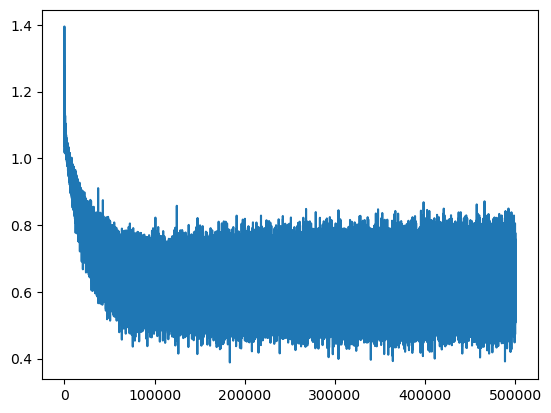

In [45]:
plt.plot(mlpClassifier.costs)

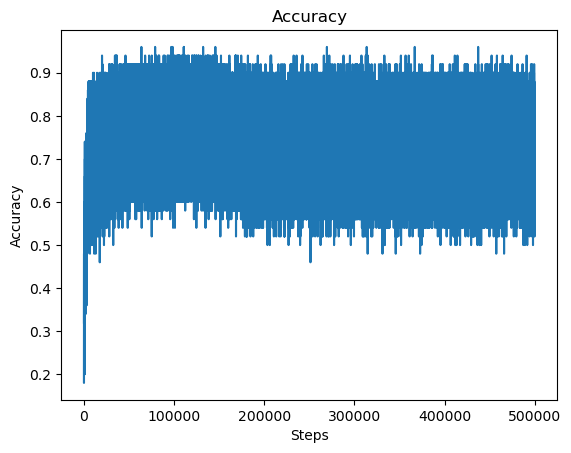

In [46]:
plt.plot(mlpClassifier.accuracy)
plt.title('Accuracy')
plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.show()

F1-Score: 0.7300533023424589


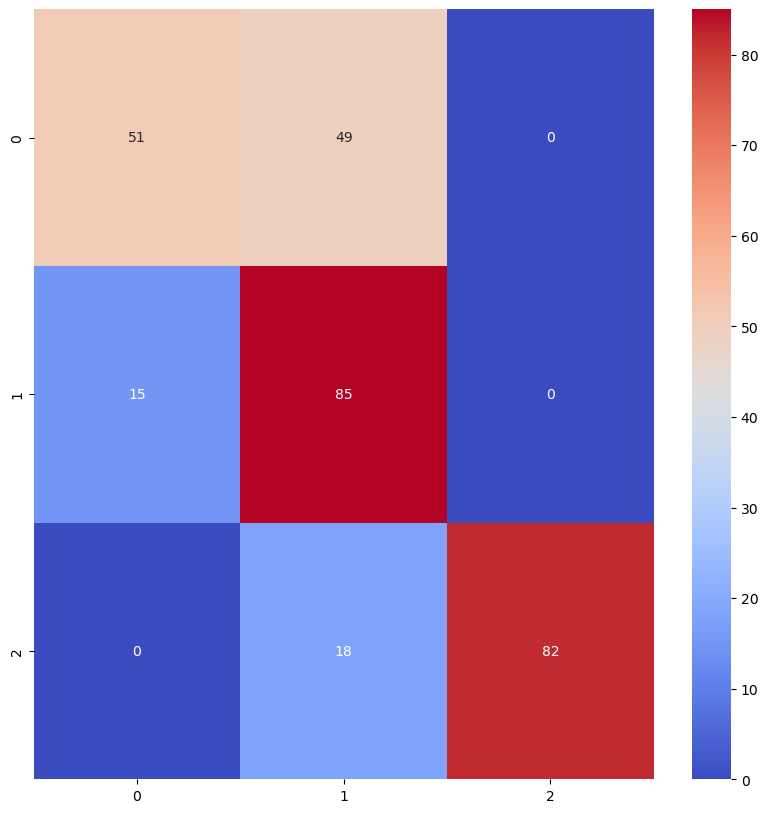

In [47]:
y_pred = mlpClassifier.predict(x_dev)
y_dev_one_hot = y_dev_one_hot.argmax(axis=1)
print(f'F1-Score: {f1_score(y_dev_one_hot, y_pred, average="macro")}')
cm = confusion_matrix(y_dev_one_hot, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='coolwarm')
plt.show()

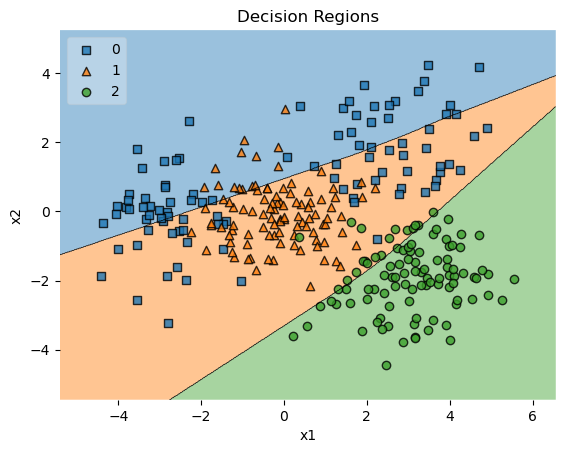

In [48]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_dev, y_dev_one_hot, clf=mlpClassifier, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Regions')
plt.show()

In [49]:
print(f'Overall Accuracy: {mlpClassifier.score(x_dev, y_dev_one_hot)}')

Overall Accuracy: 0.7266666666666667


In [50]:
accuracys.update({'Accuracy MLP': mlpClassifier.score(x_dev, y_dev_one_hot)})
f1_scores.update({'F1 MLP': f1_score(y_dev_one_hot, y_pred, average="macro")})

### Aufgabe 7 - Optimierungsbibliothek (6 Punkte)

Ergänze die obige Klasse so, dass die Optimierung der Koeffizienten mit der Bibliotheksfunktion `scipy.optimize.minimize` möglich wird und demonstriere die Funktionstüchtigkeit auf dem kleinen Entwicklungsdatensatz mit den gleichen Visualisierungen wie in Aufgabe 6.

Diskutiere die Ergebnisse.

In [51]:
'''mlpOptimize = MLPClassifier(num_nodes_per_layer = layer, max_num_steps=1000000, lr=0.001, alpha=0, random_seed=123)
mlpOptimize.optimize_parameters(x_dev, y_dev_one_hot)'''

'mlpOptimize = MLPClassifier(num_nodes_per_layer = layer, max_num_steps=1000000, lr=0.001, alpha=0, random_seed=123)\nmlpOptimize.optimize_parameters(x_dev, y_dev_one_hot)'

### Aufgabe 8 (9 Punkte)

In dieser Aufgabe wirst du deine MLP-Implementierung verwenden, um ein Modell für die Vorhersage der Blutzellentypen zu entwickeln.

Dazu sollst Du die Daten vorbereiten, sodass diese für die Modellierung verwendet werden können. Und Du sollst verschiedene MLP-Varianten entwickeln und die beste im Sinne des F1-Score mit einem geeigneten Verfahren auswählen.

Berechne weiter den ungewichteten mittleren F1-Score, zeichne die Confusion Matrix, jeweils auf dem Testset. Erkläre dein Vorgehen und diskutiere die Resultate.

Du darfst `sklearn.pipeline` verwenden, wenn du möchtest.

In [52]:
#Imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
#Data
encoder = OneHotEncoder(sparse=False)
standardScaler = StandardScaler()

#Import Data
X_train = train_data.drop(columns=['image filename', 'Class'])
y_train = train_data['Class']
X_test = test_data.drop(columns=['image filename', 'Class'])
y_test = test_data['Class']

X_train_norm = standardScaler.fit_transform(X_train)
X_test_norm = standardScaler.transform(X_test)

y_train_one_hot = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.values.reshape(-1, 1))

In [54]:
layers = [X_train_norm.shape[1], 30, 50, 30, y_test_one_hot.shape[1]]

mlpClassifier = MLPClassifier(num_nodes_per_layer = layers, max_num_steps=500000, lr=0.0001, batch_size=20, random_seed=123)
mlpClassifier.fit(X = X_train_norm, y = y_train_one_hot, validate_after_every_num_steps=1000, X_val=X_test_norm, y_val=y_test_one_hot)

  0%|          | 0/500000 [00:00<?, ?it/s]

Validation cost after step 0: 1.6750494379430552
Validation accuracy after step 0: 0.6
Validation cost after step 1000: 1.5154755261404502
Validation accuracy after step 1000: 0.55
Validation cost after step 2000: 1.77771671137848
Validation accuracy after step 2000: 0.5
Validation cost after step 3000: 1.5058153588461334
Validation accuracy after step 3000: 0.55
Validation cost after step 4000: 1.5780784441889752
Validation accuracy after step 4000: 0.55
Validation cost after step 5000: 1.3250659497350172
Validation accuracy after step 5000: 0.6
Validation cost after step 6000: 1.3254620600682059
Validation accuracy after step 6000: 0.6
Validation cost after step 7000: 1.4757015593124443
Validation accuracy after step 7000: 0.55
Validation cost after step 8000: 1.7562574675655278
Validation accuracy after step 8000: 0.35
Validation cost after step 9000: 1.4950215419222217
Validation accuracy after step 9000: 0.55
Validation cost after step 10000: 1.1399198476228822
Validation accuracy

F1-Score: 0.3246098858929227


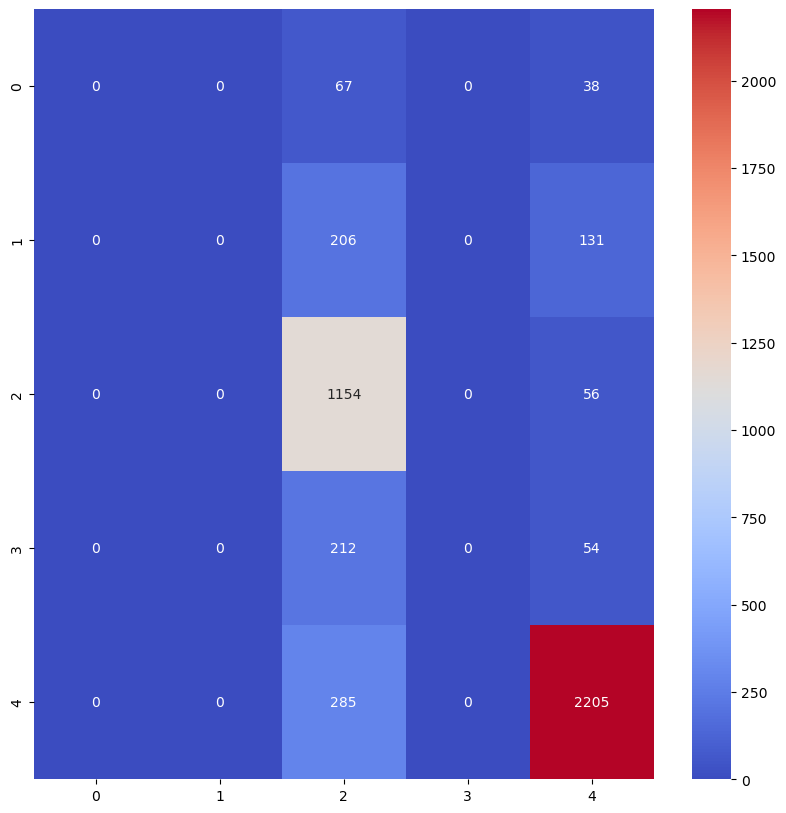

In [55]:
y_pred = mlpClassifier.predict(X_test_norm)
y_test_one_hot = y_test_one_hot.argmax(axis=1)
print(f'F1-Score: {f1_score(y_test_one_hot, y_pred, average="macro")}')
cm = confusion_matrix(y_test_one_hot, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='coolwarm')
plt.show()


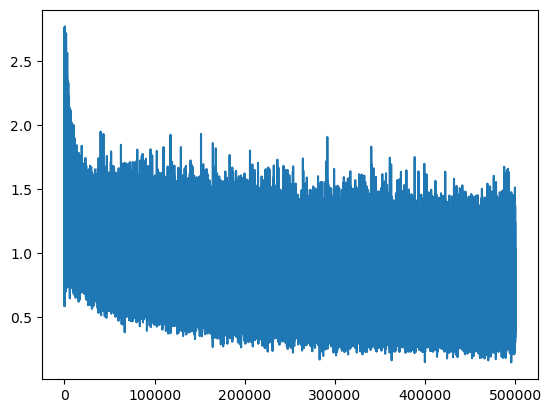

In [56]:
plt.plot(mlpClassifier.costs)

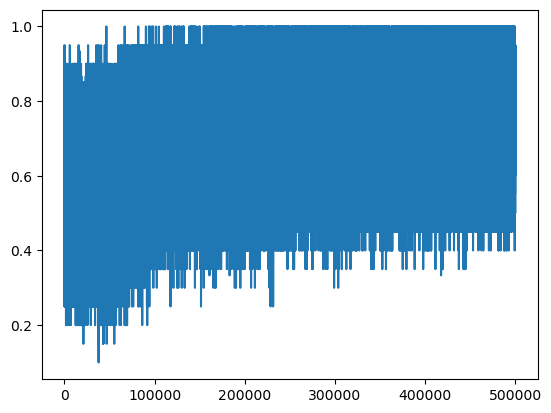

In [57]:
plt.plot(mlpClassifier.accuracy)

In [58]:
accuracys.update({'Accuracy MLP Pictures': mlpClassifier.score(X_test_norm, y_test_one_hot)})
f1_scores.update({'F1 MLP Pictures': f1_score(y_test_one_hot, y_pred, average="macro")})

### Aufgabe 9 - Weitere Klassifikationsalgorithmen (12 Punkte)

Vergleiche nun mindestens drei weitere sinnvolle Klassifikations-Methoden. Du bist dabei frei, beliebige scikit-learn Modelle zur Vorhersage der Blutzellentypen zu verwenden, um jeweils eine möglichst gute Vorhersage im Sinne Zielmetrik F1-Score zu erreichen.

Berechne jeweils weiter den ungewichteten mittleren F1-Score und zeichne die Confusion Matrix.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

In [60]:
#Import Data
train_data = pd.read_csv('data/bloodcells_train.csv', delimiter=';')
test_data = pd.read_csv('data/bloodcells_test.csv', delimiter=';')
X_train = train_data.drop(columns=['image filename', 'Class'])
y_train = train_data['Class']
X_test = test_data.drop(columns=['image filename', 'Class'])
y_test = test_data['Class']

standardScaler = StandardScaler()

X_train_norm = standardScaler.fit_transform(X_train)
X_test_norm = standardScaler.transform(X_test)


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

F1-Score: 0.8721414113614283


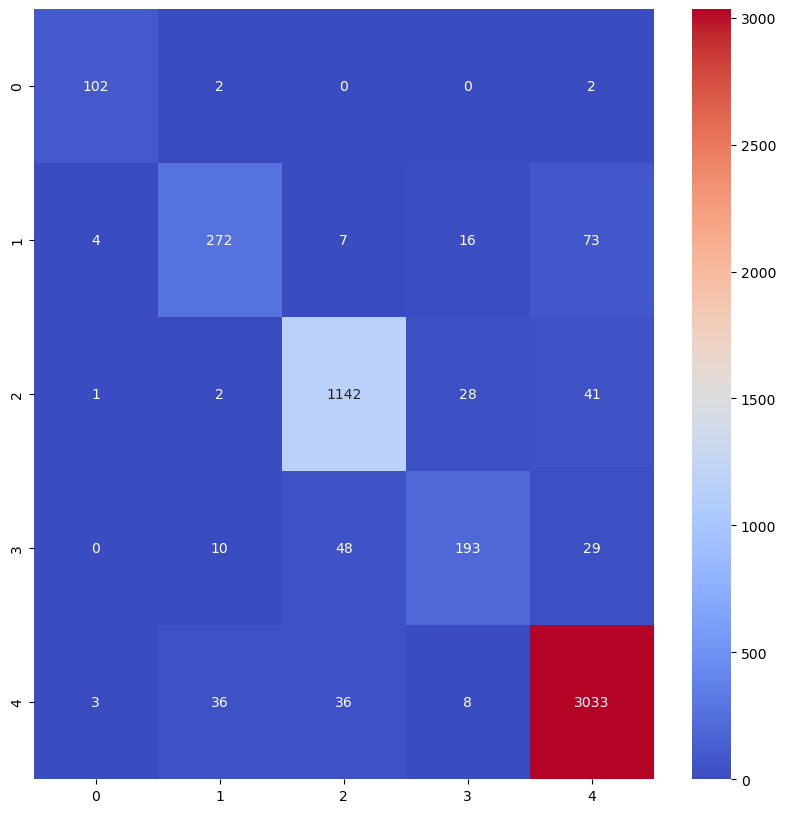

In [61]:
randomForest = RandomForestClassifier(random_state=123)

grid_params = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10,  50],
    #'min_samples_split': [5, 10, 20],
    #'min_samples_leaf': [5, 10, 20],
    'max_features': ['auto', 'sqrt']
}

gridsearch = GridSearchCV(randomForest, grid_params, scoring=make_scorer(f1_score, average='macro'), cv=5, n_jobs=-1)

gridsearch.fit(X_train_norm, y_train)

y_pred = gridsearch.predict(X_test_norm)
print(f'F1-Score: {f1_score(y_test, y_pred, average="macro")}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='coolwarm')
plt.show()

In [62]:
accuracys.update({'Accuracy Random Forest': gridsearch.score(X_test_norm, y_test)})
f1_scores.update({'F1 Random Forest': f1_score(y_test, y_pred, average="macro")})

In [63]:
gridsearch.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}

F1-Score: 0.8808591565784623
Best Params: {'C': 10, 'degree': 2, 'gamma': 'scale'}


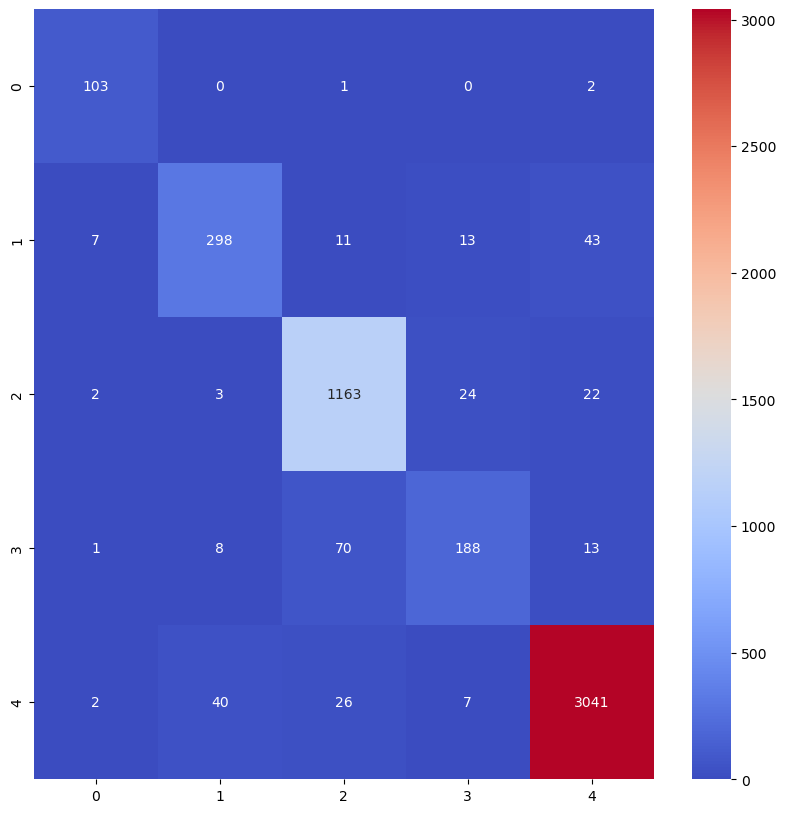

In [64]:
svc = SVC(random_state=123)

grid_params = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

gridsearch = GridSearchCV(svc, grid_params, scoring=make_scorer(f1_score, average='macro'), cv=5, n_jobs=-1)

gridsearch.fit(X_train_norm, y_train)

y_pred = gridsearch.predict(X_test_norm)
print(f'F1-Score: {f1_score(y_test, y_pred, average="macro")}')
print(f'Best Params: {gridsearch.best_params_}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='coolwarm')
plt.show()


In [65]:
accuracys.update({'Accuracy SVC': gridsearch.score(X_test_norm, y_test)})
f1_scores.update({'F1 SVC': f1_score(y_test, y_pred, average="macro")})

F1-Score: 0.834409517039394


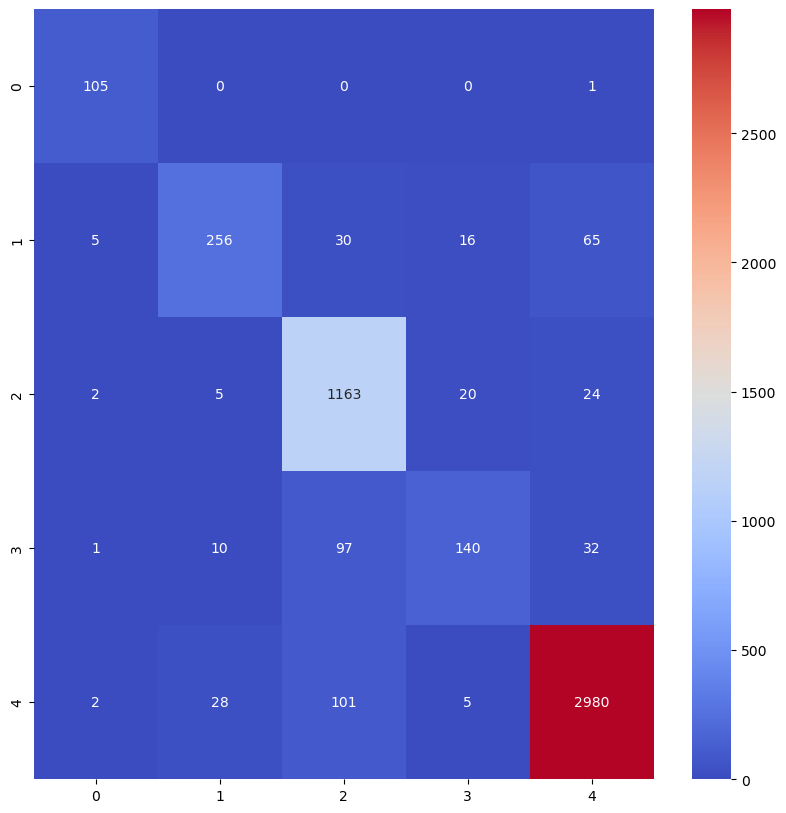

In [66]:
#KNeighborsClassifier
knn = KNeighborsClassifier()

grid_params = {
    'n_neighbors': [3, 4, 5, 6, 7, 10, 20],
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [5, 9, 10, 11, 20, 30, 40, 50]
}

gridsearch = GridSearchCV(knn, grid_params, scoring=make_scorer(f1_score, average='macro'), cv=5, n_jobs=-1)

gridsearch.fit(X_train_norm, y_train)

y_pred = gridsearch.predict(X_test_norm)
print(f'F1-Score: {f1_score(y_test, y_pred, average="macro")}')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='coolwarm')
plt.show()

In [67]:
accuracys.update({'Accuracy KNN': gridsearch.score(X_test_norm, y_test)})
f1_scores.update({'F1 KNN': f1_score(y_test, y_pred, average="macro")})

### Aufgabe 10 - Übersicht der Resultate (6 Punkte)

Stelle die Resultate der verschiedenen Modelle aus den vorhergehenden Aufgaben zur Vorhersage des Blutzellentyps, inklusive der heuristischen Ansätze, in einer Tabelle zusammen und auch graphisch dar. 

Was empfiehlst Du Karolina?

Diskutiere deine Einsichten. 


In [68]:
accuracyDf = pd.DataFrame.from_dict(accuracys, orient='index', columns=['Accuracy'])
accuracyDf

Accuracy
Accuracy most frequent        0.564882
Accuracy stratified           0.414247
Accuracy Logistic Regression  0.579401
Accuracy MLP                  0.726667
Accuracy MLP Pictures         0.762024
Accuracy Random Forest        0.872141
Accuracy SVC                  0.880859
Accuracy KNN                  0.834410

In [69]:
f1Df = pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1-Score'])
f1Df

F1-Score
F1 most frequent        0.144390
F1 stratified           0.204384
F1 Logistic Regression  0.220767
F1 MLP                  0.730053
F1 MLP Pictures         0.324610
F1 Random Forest        0.872141
F1 SVC                  0.880859
F1 KNN                  0.834410

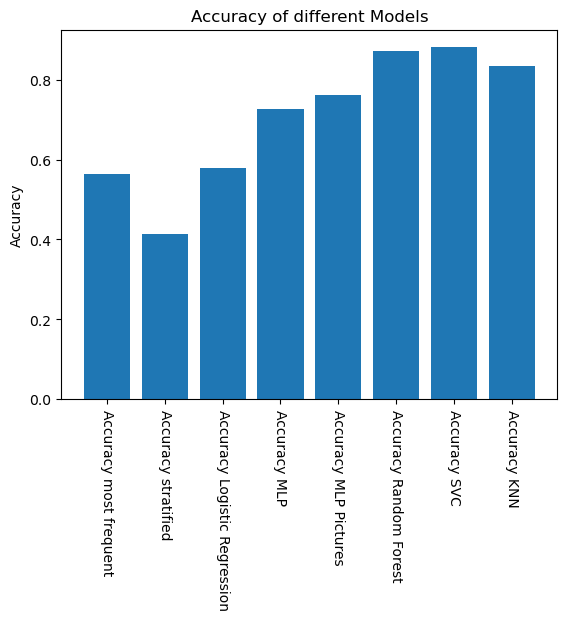

In [70]:
plt.bar(accuracys.keys(), accuracys.values())
plt.xticks(rotation=-90)
plt.ylabel('Accuracy')
plt.title('Accuracy of different Models')
plt.show()

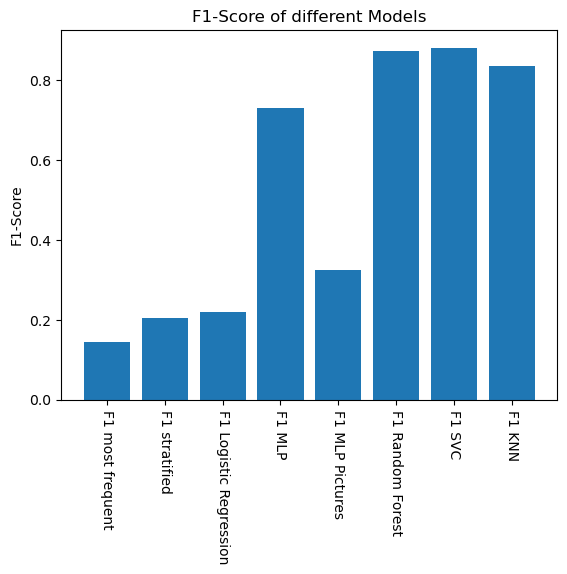

In [71]:
plt.bar(f1_scores.keys(), f1_scores.values())
plt.xticks(rotation=-90)
plt.ylabel('F1-Score')
plt.title('F1-Score of different Models')
plt.show()

**Empfehlung:**
Anhand der Accuracies und F1-Scores können die verschiedenen Modelle miteinander verglichen werden. Die besten Ergebnise erzielten die Modelle der sklearn-Bibliothek. Diese überzeugen Accuracys bis zu 0.8 und F1-Scores bis zu 0.88. Gleichzeitig sind sie schnell und nicht so rechenintensiv. Die MLP-Modelle sind zwar auch gut, jedoch sind sie sehr rechenintensiv und benötigen viel Zeit. Die heuristischen Ansätze sind nicht zu empfehlen, da sie sehr schlechte Ergebnisse erzielen.